In [1]:
# import the necessary libraries
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import time
import requests
import IPython
from IPython.core.display import HTML
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

import contextily as cx
from matplotlib import pyplot as plt

import momepy

import networkx as nx

In [2]:
shape_link = 'RouteMali_Tronçons.shp'

In [3]:
shape = gpd.read_file(shape_link)

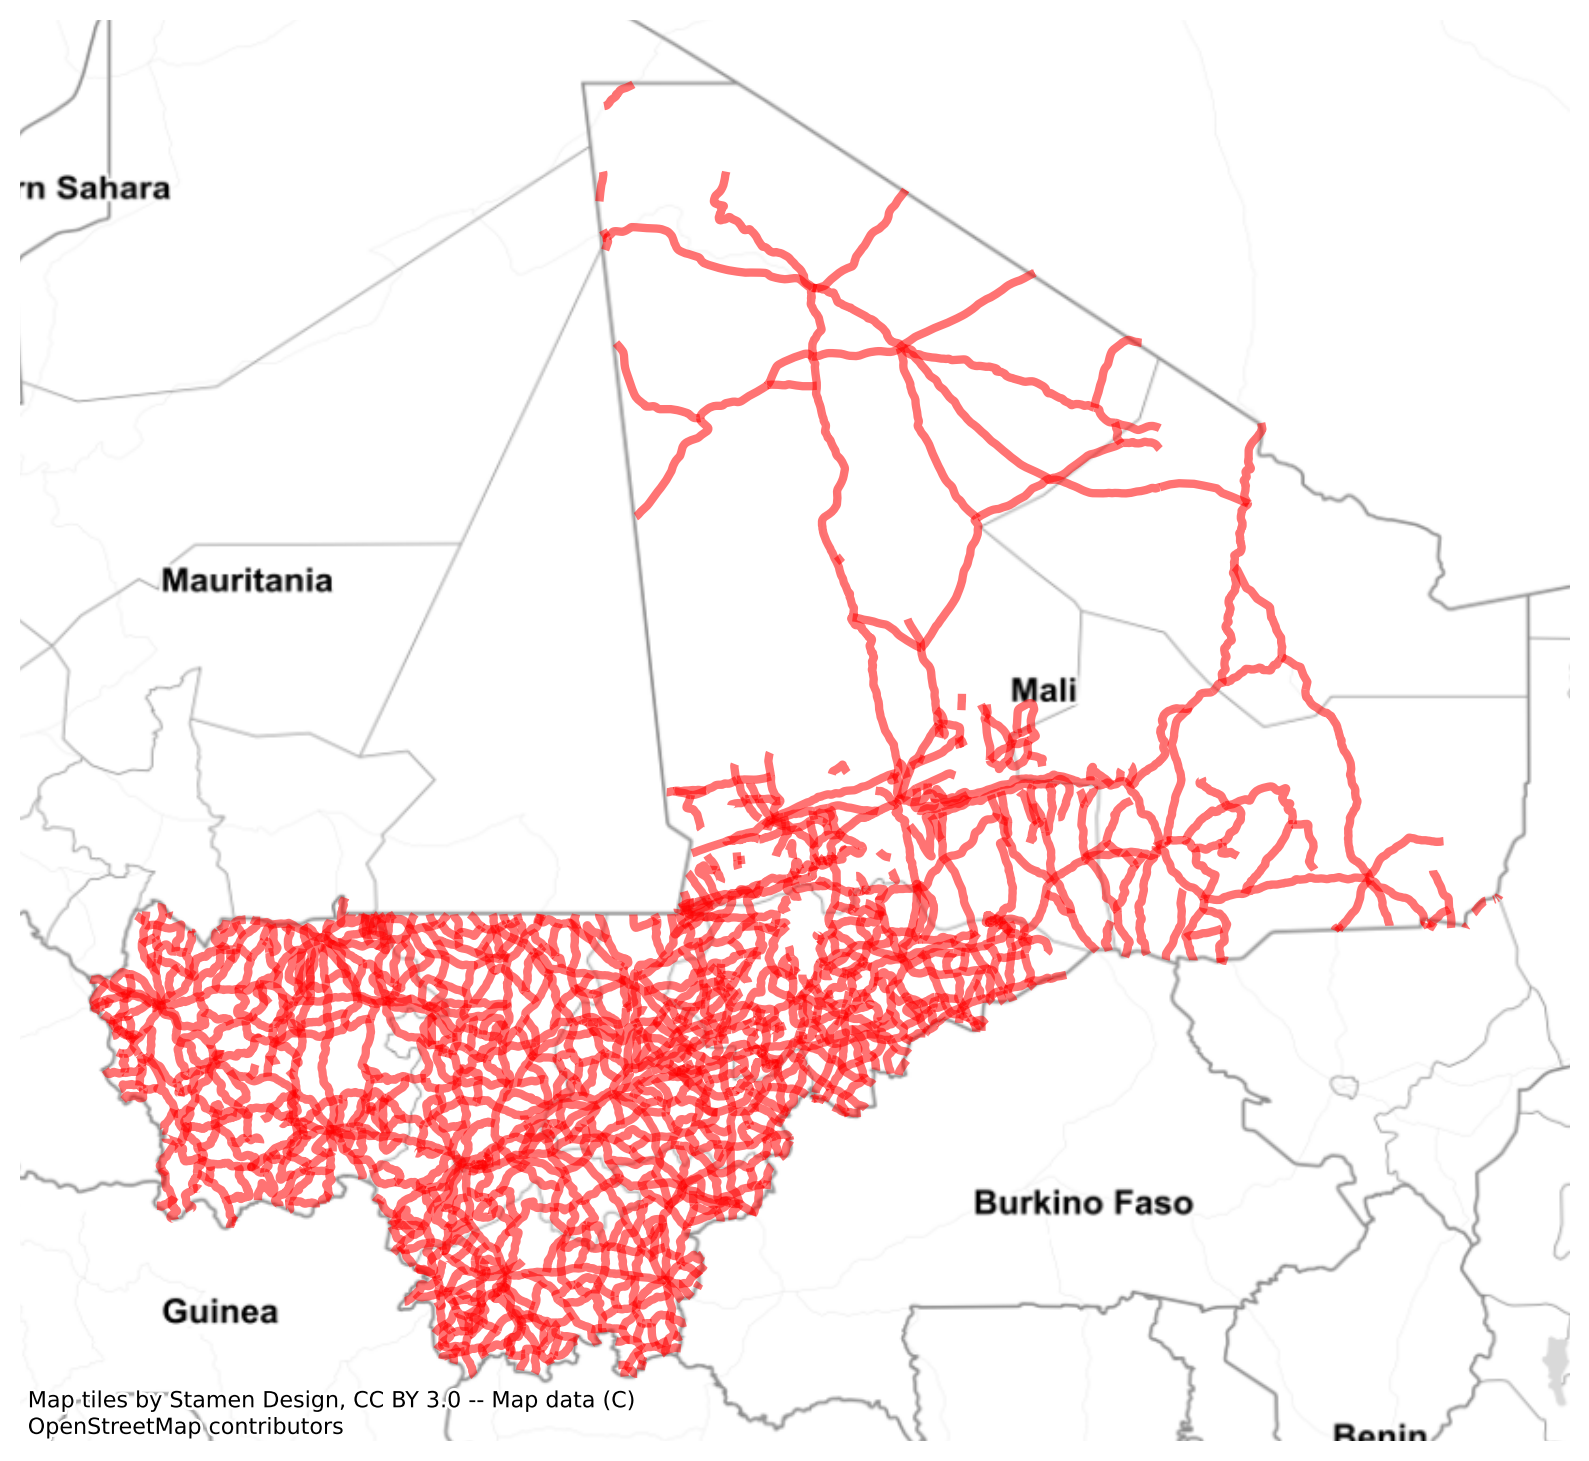

In [4]:
#Show city parts on Open Street Map
ax = shape.plot(color="r", linewidth=3, alpha = 0.55, figsize=(10, 10))
ax.set_axis_off()
cx.add_basemap(ax, crs=shape.crs.to_string(), source=cx.providers.Stamen.TonerLite)

In [5]:
shape.apply(pd.Series.nunique)

OBJECTID_1    1837
FID_1            1
OBJECTID         1
SOURCEID         4
EXS              1
NOTES            0
ONME            73
RTENME          32
NTLCLASS         5
FCLASS           5
CRGWAY           1
NUMLANES         1
LNEWIDTHM        1
RDWIDTHM         1
AXLELOADMT       1
TOTLOADMT        1
SRFTPE           4
SRFCOND          3
SRFPREP          2
ISSEASONAL       1
CURNTPRAC        1
GDWTHRPRAC       1
BDWTHRPRAC       1
SPEEDLIMIT       1
CURNTSPEED       1
GNRALSPEED       1
ISUNDRCSTR       1
CSTWRKETC        1
GRADDEG          1
SEC              1
HASSHOULDR       1
HASSIDEWLK       1
DRIVSIDE         1
ISELEVATED       1
HASMEDIAN        1
OPSTATUS         1
SHAPE_LENG    1530
ADM0_CODE        2
ADM0_NAME        1
CONTINENT        1
REGION           1
ROADID        1837
Shape_Le_1    1837
Distance       169
geometry      1852
dtype: int64

## Data Cleaning

In [6]:
shape.NTLCLASS.unique()

array(['Track/Trail', 'Tertiary', 'Primary', 'Secondary', 'Tracl/Trail',
       nan], dtype=object)

In [7]:
#grammer mistake
shape.NTLCLASS[305] = 'Track/Trail'

#distance 0 values
shape.loc[(shape.Distance==0)]

OBJECTID_1  FID_1  OBJECTID          SOURCEID  EXS  NOTES ONME RTENME     NTLCLASS  FCLASS  CRGWAY  NUMLANES  LNEWIDTHM  RDWIDTHM  AXLELOADMT  TOTLOADMT  SRFTPE  SRFCOND  SRFPREP  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  BDWTHRPRAC  SPEEDLIMIT  CURNTSPEED  GNRALSPEED  ISUNDRCSTR   CSTWRKETC  GRADDEG  SEC  HASSHOULDR  HASSIDEWLK  DRIVSIDE  ISELEVATED  HASMEDIAN  OPSTATUS  SHAPE_LENG  ADM0_CODE ADM0_NAME CONTINENT          REGION     ROADID  Shape_Le_1  Distance  \
106          155    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0         NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.233742      155.0      Mali    Africa  Western Africa  2817153.0    0.000250         0   
107          156    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN    Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0         NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.416958      155.0      Mali    Africa  Western Africa  2817154.0    0.002820         0   
109          160    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0         NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    1.037854      155.0      Mali    Africa  Western Africa  2817159.0    0.001992         0   
113          164    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0         NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.362078      155.0      Mali    Africa  Western Africa  2817163.0    0.000290         0   
140          200    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN    Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0         NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.260142      155.0      Mali    Africa  Western Africa  2817201.0    0.002717         0   
...          ...    ...       ...               ...  ...    ...  ...    ...          ...     ...     ...       ...        ...       ...         ...        ...     ...      ...      ...         ...        ...         ...         ...         ...         ...         ...         ...         ...      ...  ...         ...         ...       ...         ...        ...       ...         ...        ...       ...       ...             ...        ...         ...       ...   
1605        2315    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN     Tertiary     4.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0         NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.066495      155.0      Mali    Africa  Western Africa  2818941.0    0.001072         0   
1610        2325    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN     Tertiary     4.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0       

In [8]:
#See what types of road there are
shape.Distance.unique()

array([ 14,  47,  13,  12,   4,   7,   9,  21,  23,  17,   8, 115,  16,
       126,  30, 104,   3,  26, 192,  10,  37,  38,  18,   5,  27,  24,
        36,  82,   6,   1,  25,  20, 210,  28,  29,  19,  15,  11,  34,
        46,   2,   0,  80,  44,  43,  35,  50,  40, 208,  39,  42, 159,
        22, 139,  95,  64,  54,  31, 199,  48, 129,  86,  55, 102,  52,
       122,  84,  77,  58, 178, 223,  32,  75,  45,  53,  41,  51, 116,
        61,  81,  68,  94, 125,  33, 106, 163,  49,  57, 108,  79, 110,
       121,  97, 100,  85, 120, 135, 245, 154,  65,  88,  72,  69, 156,
       160,  93,  60, 118, 203, 313, 123,  71,  90,  56, 220,  76, 107,
       172, 157,  67,  62, 149,  96, 109,  78, 268, 165, 242, 140, 298,
       270, 290, 119,  59, 128, 101, 113, 193, 256, 138,  66, 127, 237,
        63, 111, 212, 142, 124, 112,  83,  74,  70, 327,  91, 143, 985,
       179, 188, 275, 136, 186, 523, 117, 254, 183, 169, 230, 147, 187],
      dtype=int64)

In [9]:
shape.FCLASS.unique()

array([ 6.,  4.,  2.,  3., 10.])

In [10]:
shape.NTLCLASS.unique()

array(['Track/Trail', 'Tertiary', 'Primary', 'Secondary', nan],
      dtype=object)

In [11]:
head = shape.head()

In [12]:
shape.loc[(shape.NTLCLASS=='Tracl/Trail')]

Empty GeoDataFrame
Columns: [OBJECTID_1, FID_1, OBJECTID, SOURCEID, EXS, NOTES, ONME, RTENME, NTLCLASS, FCLASS, CRGWAY, NUMLANES, LNEWIDTHM, RDWIDTHM, AXLELOADMT, TOTLOADMT, SRFTPE, SRFCOND, SRFPREP, ISSEASONAL, CURNTPRAC, GDWTHRPRAC, BDWTHRPRAC, SPEEDLIMIT, CURNTSPEED, GNRALSPEED, ISUNDRCSTR, CSTWRKETC, GRADDEG, SEC, HASSHOULDR, HASSIDEWLK, DRIVSIDE, ISELEVATED, HASMEDIAN, OPSTATUS, SHAPE_LENG, ADM0_CODE, ADM0_NAME, CONTINENT, REGION, ROADID, Shape_Le_1, Distance, geometry]
Index: []

## Building Graph

Some nodes are missing. Trying to fix this by understanding how the nodes and links are determined.

In [13]:
head

OBJECTID_1  FID_1  OBJECTID          SOURCEID  EXS  NOTES ONME RTENME     NTLCLASS  FCLASS  CRGWAY  NUMLANES  LNEWIDTHM  RDWIDTHM  AXLELOADMT  TOTLOADMT  SRFTPE  SRFCOND  SRFPREP  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  BDWTHRPRAC  SPEEDLIMIT  CURNTSPEED  GNRALSPEED  ISUNDRCSTR CSTWRKETC  GRADDEG  SEC  HASSHOULDR  HASSIDEWLK  DRIVSIDE  ISELEVATED  HASMEDIAN  OPSTATUS  SHAPE_LENG  ADM0_CODE ADM0_NAME CONTINENT          REGION     ROADID  Shape_Le_1  Distance  \
0           1    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.125180      155.0      Mali    Africa  Western Africa  2816995.0    0.125180        14   
1           2    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN     Tertiary     4.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.130968      155.0      Mali    Africa  Western Africa  2816996.0    0.130968        47   
2           3    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.003300      155.0      Mali    Africa  Western Africa  2816997.0    0.120872        13   
3           4    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.104587      155.0      Mali    Africa  Western Africa  2816998.0    0.104587        12   
4           5    0.0       0.0  srce201105130009  0.0    NaN  NaN    NaN  Track/Trail     6.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.033688      155.0      Mali    Africa  Western Africa  2816999.0    0.033688         4   

                                            geometry  
0  LINESTRING (-6.12580 10.20723, -6.12870 10.238...  
1  LINESTRING (-5.98460 10.23623, -5.98910 10.236...  
2  LINESTRING (-6.19790 10.33433, -6.19460 10.334...  
3  LINESTRING (-5.94030 10.28343, -5.93970 10.287...  
4  LINESTRING (-5.91450 10.38413, -5.88230 10.37423)

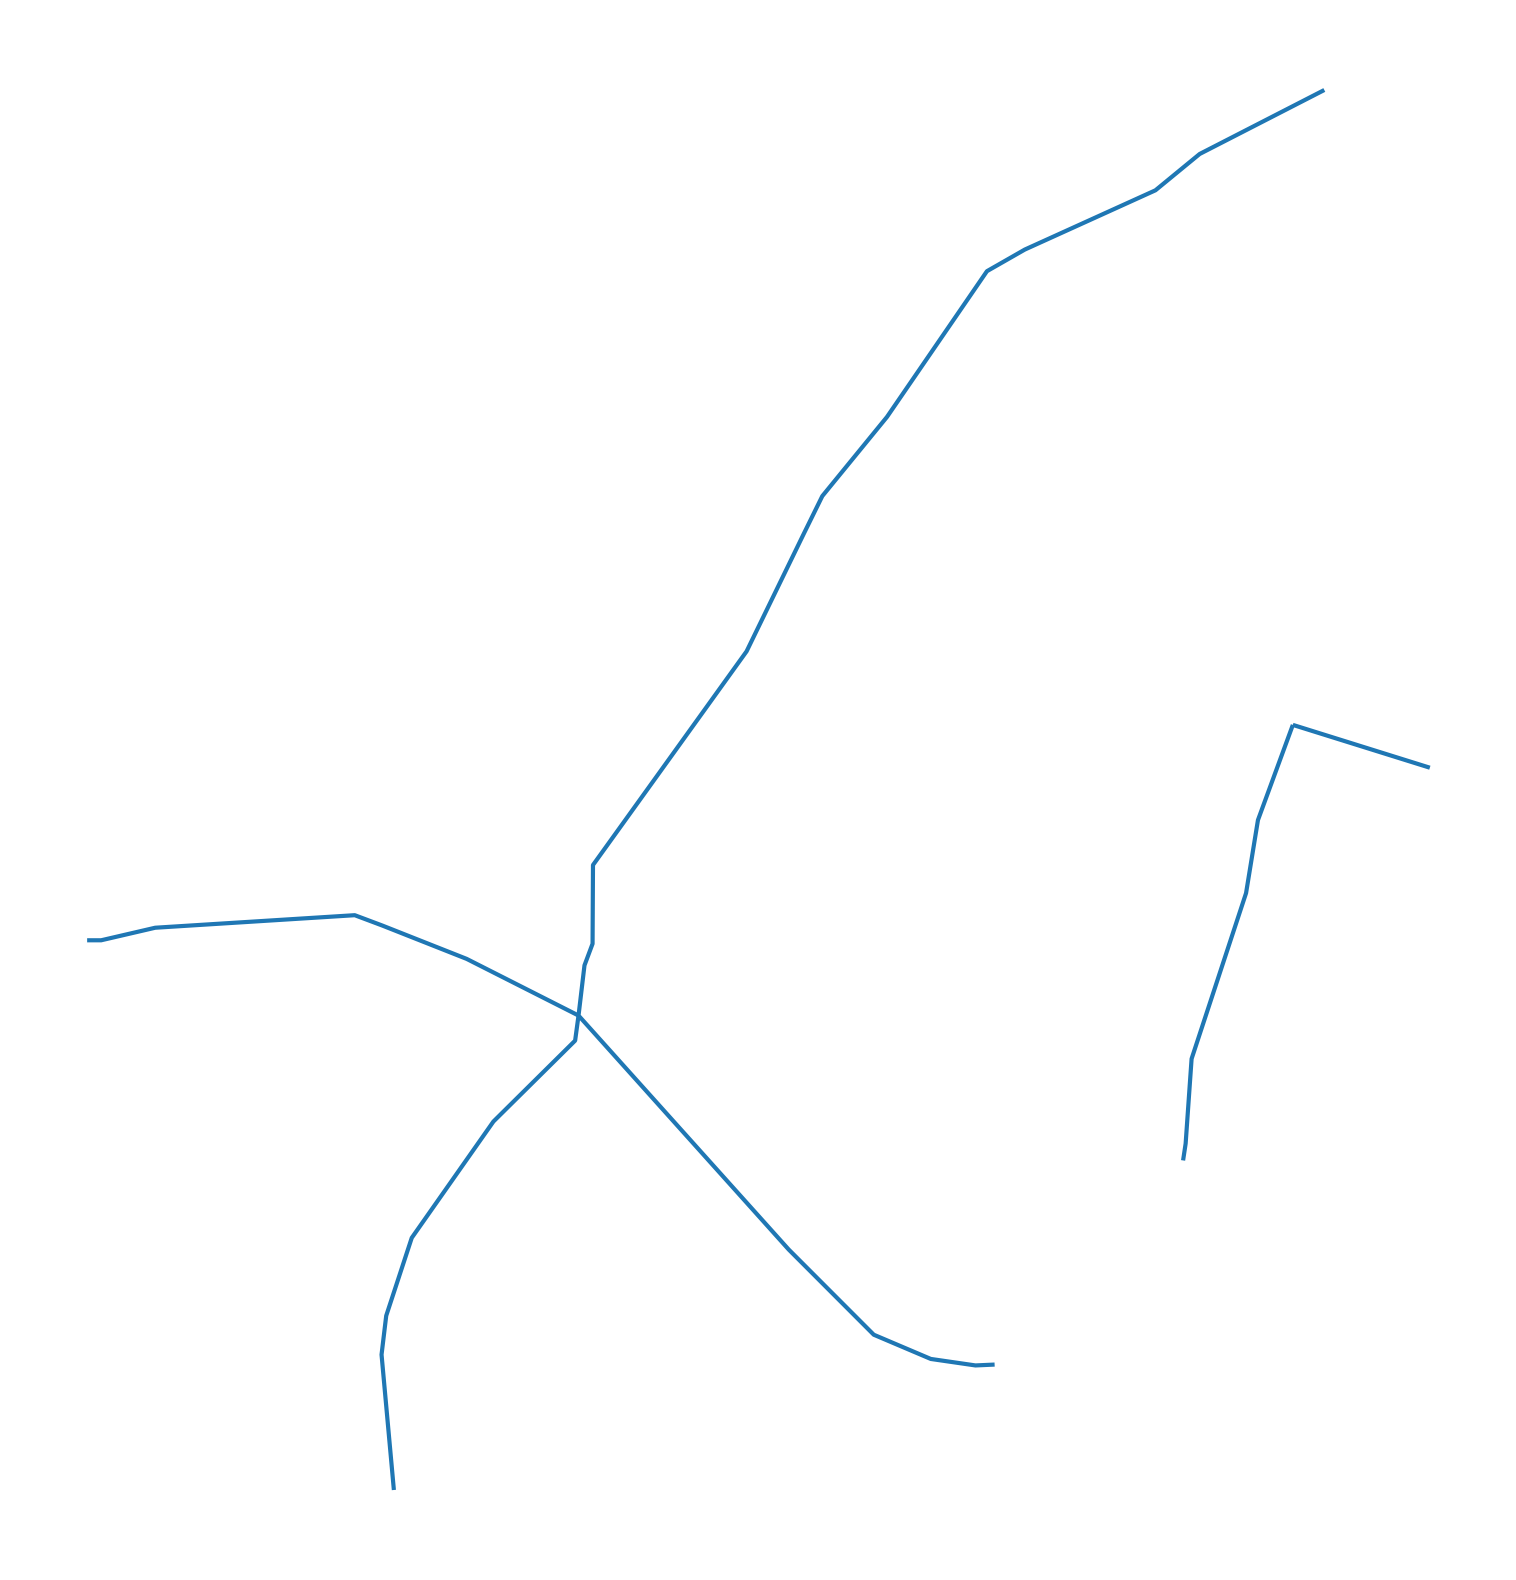

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
head.plot(ax=ax)
ax.set_axis_off()
plt.show()

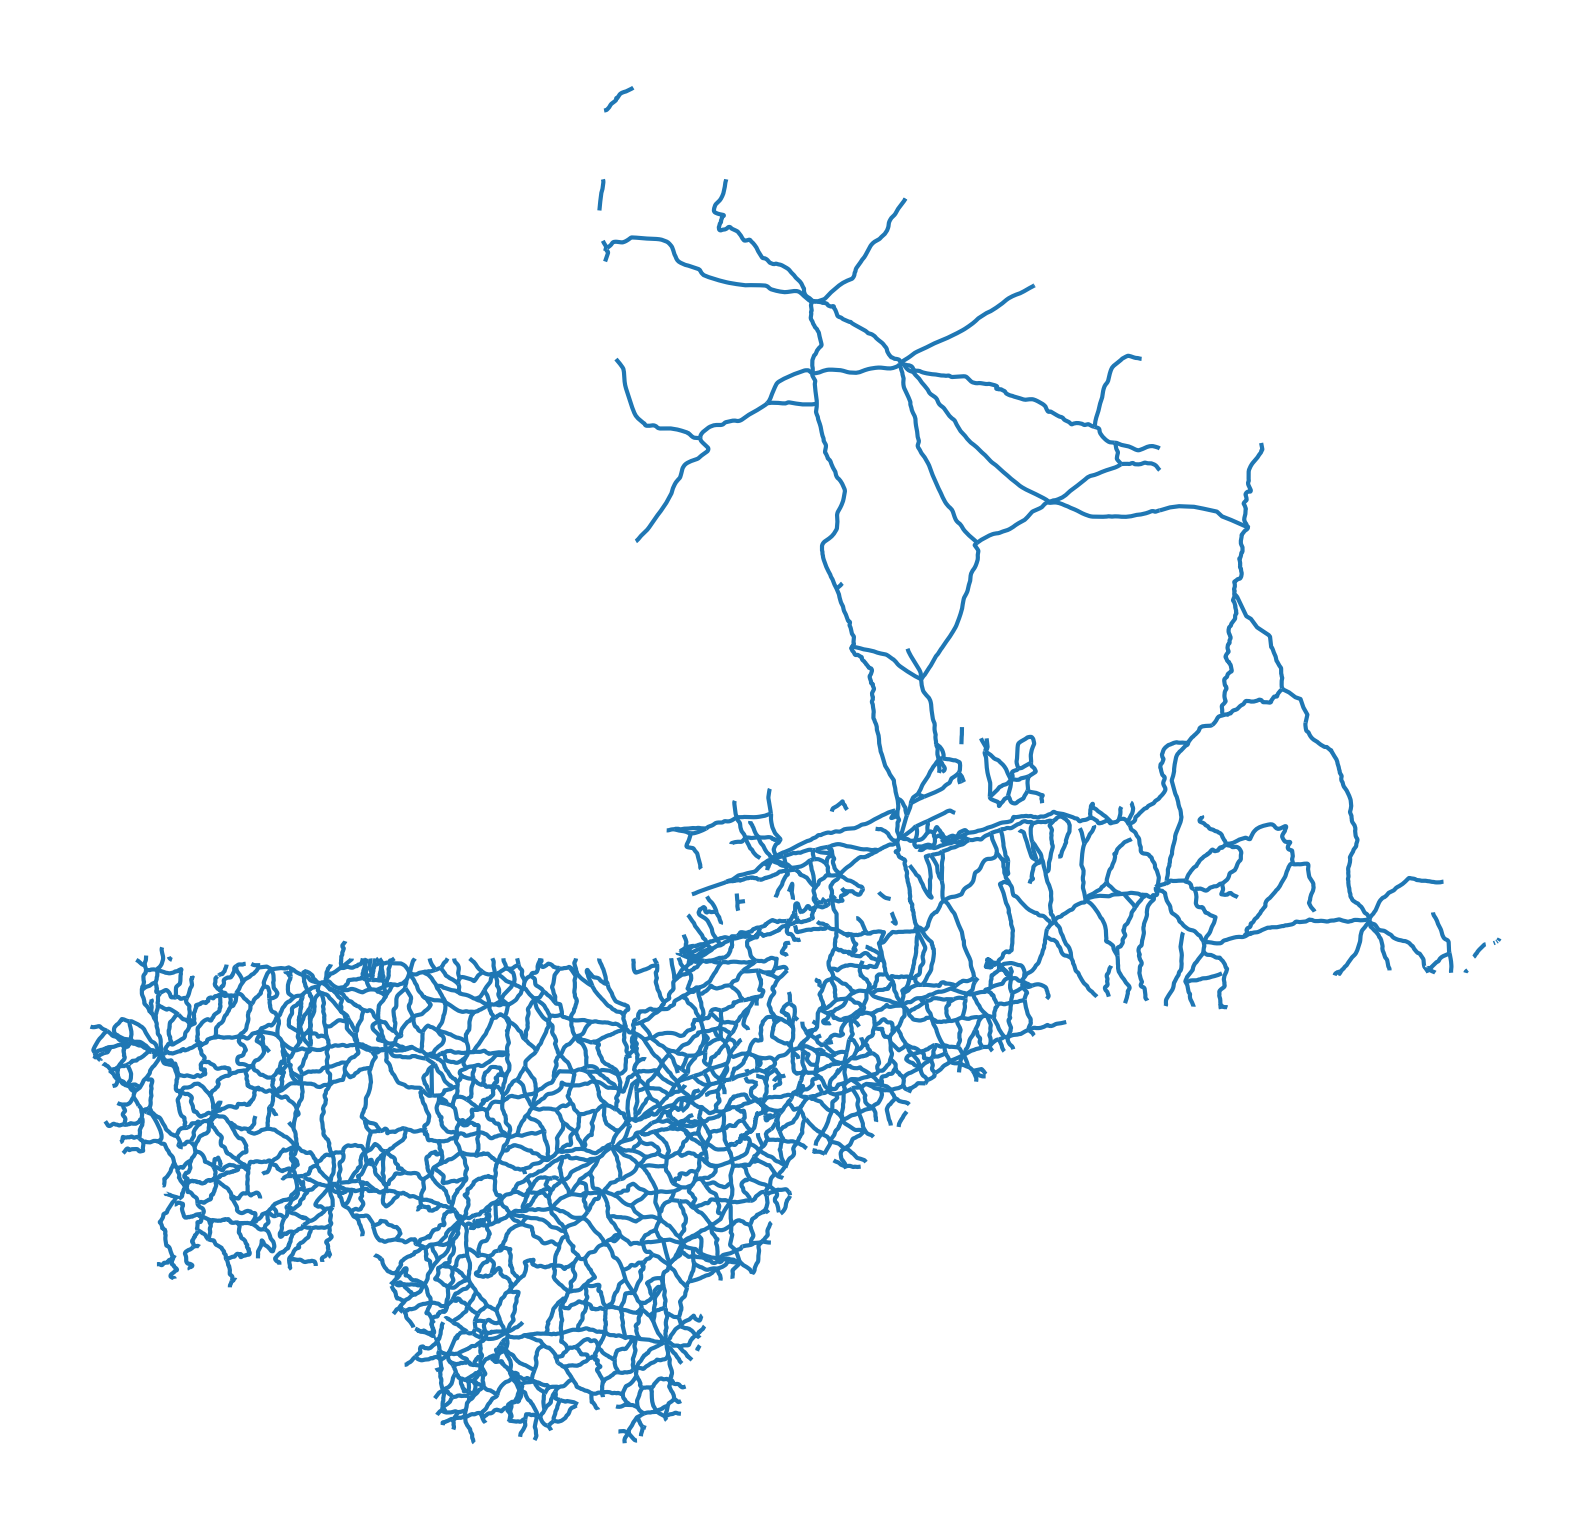

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
shape.plot(ax=ax)
ax.set_axis_off()
plt.show()

Build a network solely based on primary and secondary roads.

In [16]:
primsecnetwork = shape.loc[(shape['NTLCLASS']=='Primary') | (shape['NTLCLASS']=='Secondary')]
primsecnetwork.head()

OBJECTID_1  FID_1  OBJECTID          SOURCEID  EXS  NOTES  ONME     RTENME   NTLCLASS  FCLASS  CRGWAY  NUMLANES  LNEWIDTHM  RDWIDTHM  AXLELOADMT  TOTLOADMT  SRFTPE  SRFCOND  SRFPREP  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  BDWTHRPRAC  SPEEDLIMIT  CURNTSPEED  GNRALSPEED  ISUNDRCSTR CSTWRKETC  GRADDEG  SEC  HASSHOULDR  HASSIDEWLK  DRIVSIDE  ISELEVATED  HASMEDIAN  OPSTATUS  SHAPE_LENG  ADM0_CODE ADM0_NAME CONTINENT          REGION     ROADID  Shape_Le_1  Distance  \
12          13    0.0       0.0  srce201105130009  0.0    NaN   RN9        NaN    Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.026665      155.0      Mali    Africa  Western Africa  2817007.0    0.026665       115   
15          17    0.0       0.0  srce201105130009  0.0    NaN  RR18        NaN  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.314656      155.0      Mali    Africa  Western Africa  2817011.0    0.314656       126   
17          19    0.0       0.0  srce201105130009  0.0    NaN   RN7  undefined    Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     1.0      2.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.048033      155.0      Mali    Africa  Western Africa  2817013.0    0.048033       104   
25          31    0.0       0.0  srce201105130009  0.0    NaN  RR17        NaN  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.120145      155.0      Mali    Africa  Western Africa  2817025.0    0.120145       192   
44          61    0.0       0.0  srce201105130009  0.0    NaN  RN30        NaN    Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0       NaN      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.211827      155.0      Mali    Africa  Western Africa  2817055.0    0.211827        82   

                                             geometry  
12  LINESTRING (-7.45434 10.44032, -7.44568 10.458...  
15  MULTILINESTRING ((-7.84840 10.21273, -7.85360 ...  
17  LINESTRING (-5.64480 10.45773, -5.65080 10.463...  
25  MULTILINESTRING ((-5.66240 10.50093, -5.66520 ...  
44  LINESTRING (-6.89063 11.08619, -6.87620 11.074...

Simple visualisation of the network

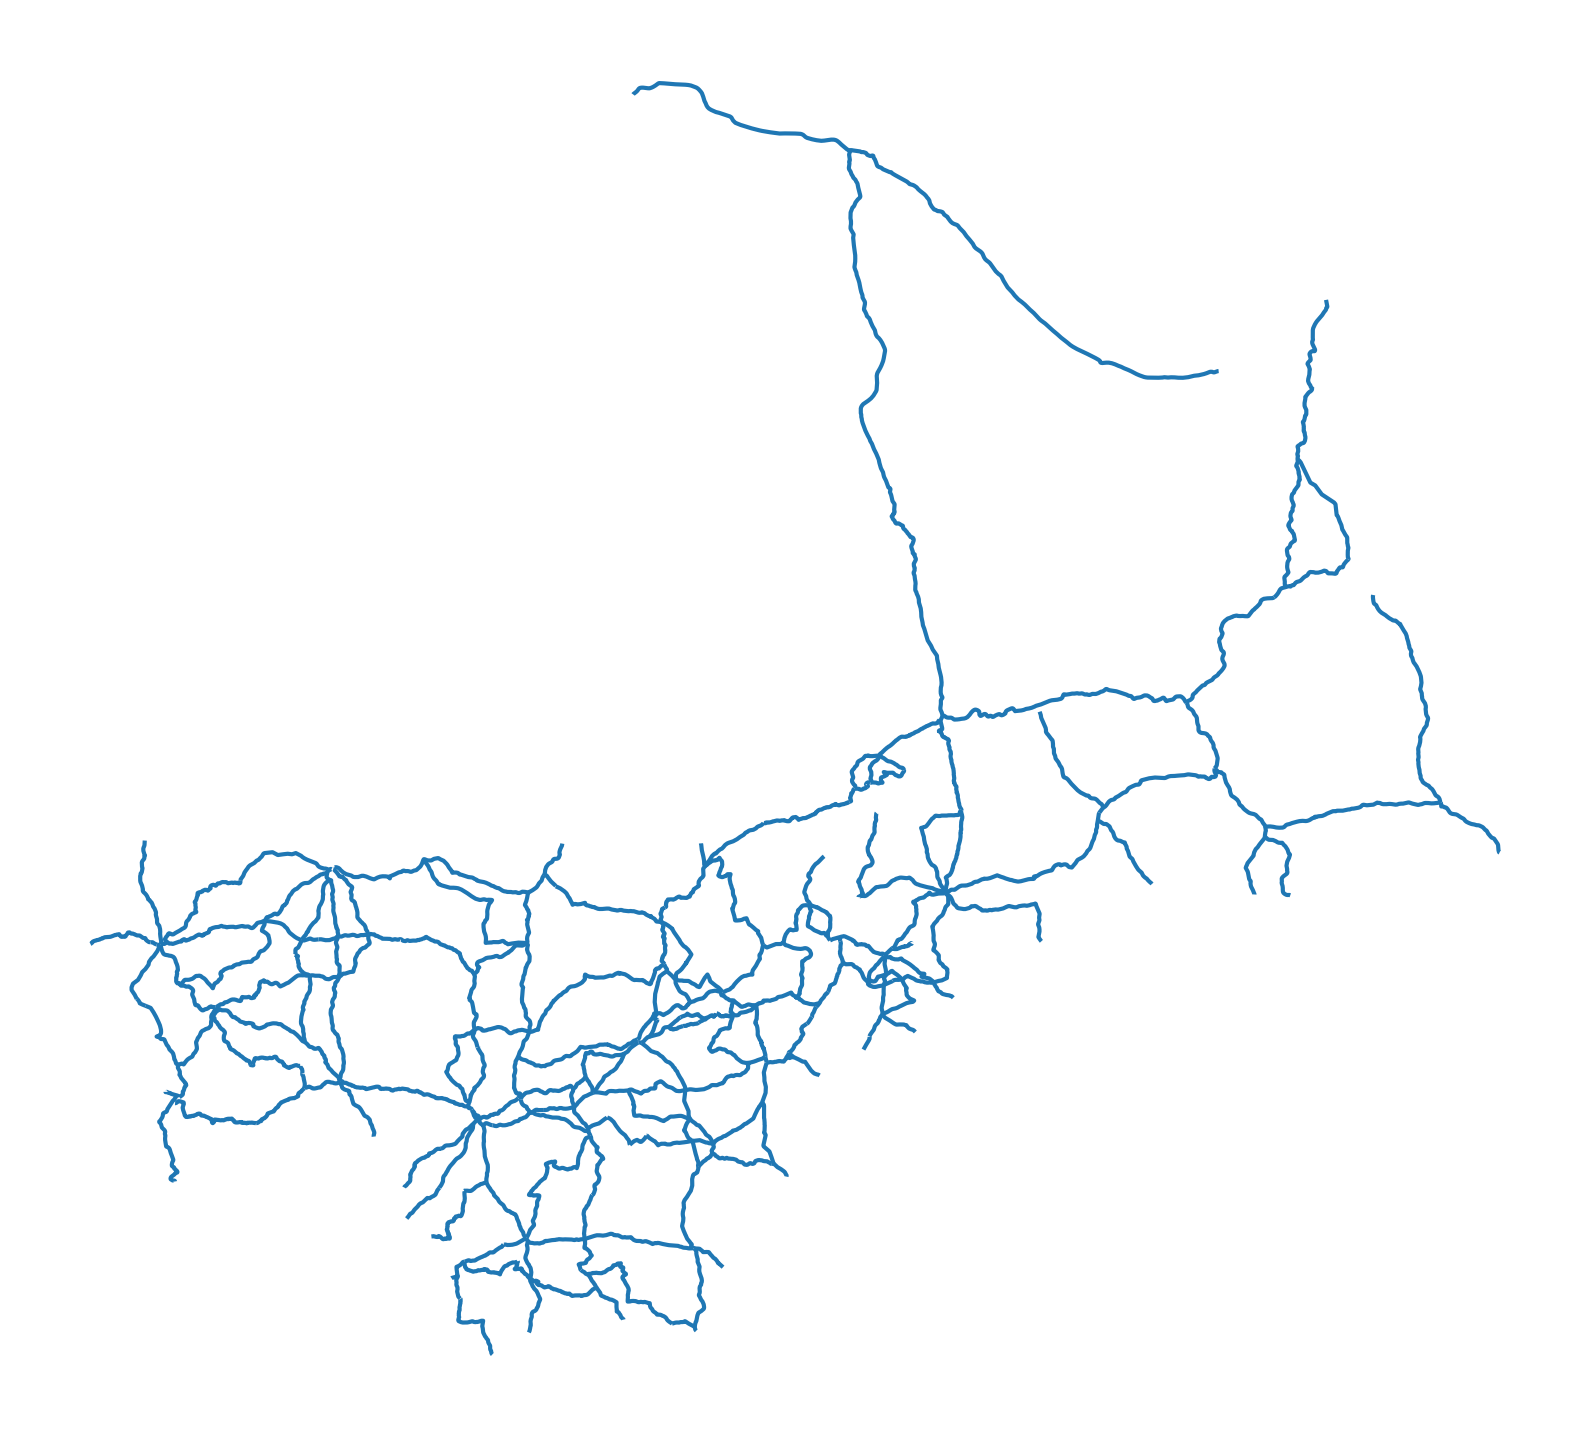

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
primsecnetwork.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [18]:
primsecnetworkexpl = primsecnetwork.explode()
Primsecgraphprimal = momepy.gdf_to_nx(primsecnetworkexpl, approach='primal')

In [19]:
#Primsecgraphprimal.is_directed()
#Primsecgraphprimal.is_multigraph()

db_tab = primsecnetwork.explode().reset_index()

print(db_tab.loc[0, "geometry"])

LINESTRING (-7.454345 10.440319, -7.445683 10.4586, -7.4396 10.487634, -7.4366 10.505934, -7.4334 10.511434, -7.434 10.530734, -7.4361 10.554834, -7.4323 10.575334, -7.4234 10.599534, -7.4223 10.609934, -7.4237 10.626534, -7.4198 10.640534, -7.4127 10.651534, -7.4051 10.656634, -7.3883 10.663134, -7.3761 10.673734, -7.3709 10.681534, -7.3681 10.692034, -7.3589 10.703534, -7.3529 10.720534, -7.3486 10.743134, -7.3418 10.758334, -7.332 10.780134, -7.3324 10.788734, -7.3341 10.792134, -7.3501 10.823734, -7.3576 10.842334, -7.3713 10.868534, -7.397 10.894334, -7.4063 10.910234, -7.4123 10.916834, -7.421 10.938334, -7.4397 10.974334, -7.437691 10.994244, -7.4364 11.007034, -7.4299 11.040134, -7.4278 11.059534, -7.4275 11.062534, -7.4342 11.102434, -7.4378 11.111734, -7.4479 11.125334, -7.4535 11.140934, -7.467 11.155234, -7.4762 11.173134, -7.4834 11.187334, -7.4919 11.208534, -7.49 11.223534, -7.4869 11.234934, -7.4746 11.266134, -7.4679 11.297534, -7.4688 11.318334, -7.475128 11.344603, -

In [20]:
length = db_tab.to_crs(
    epsg=32630 # Expressed in metres
).geometry.length
length.head()

0    114968.511597
1     98640.712580
2     27791.424773
3    103677.988797
4     28843.670489
dtype: float64

## Length of Roads

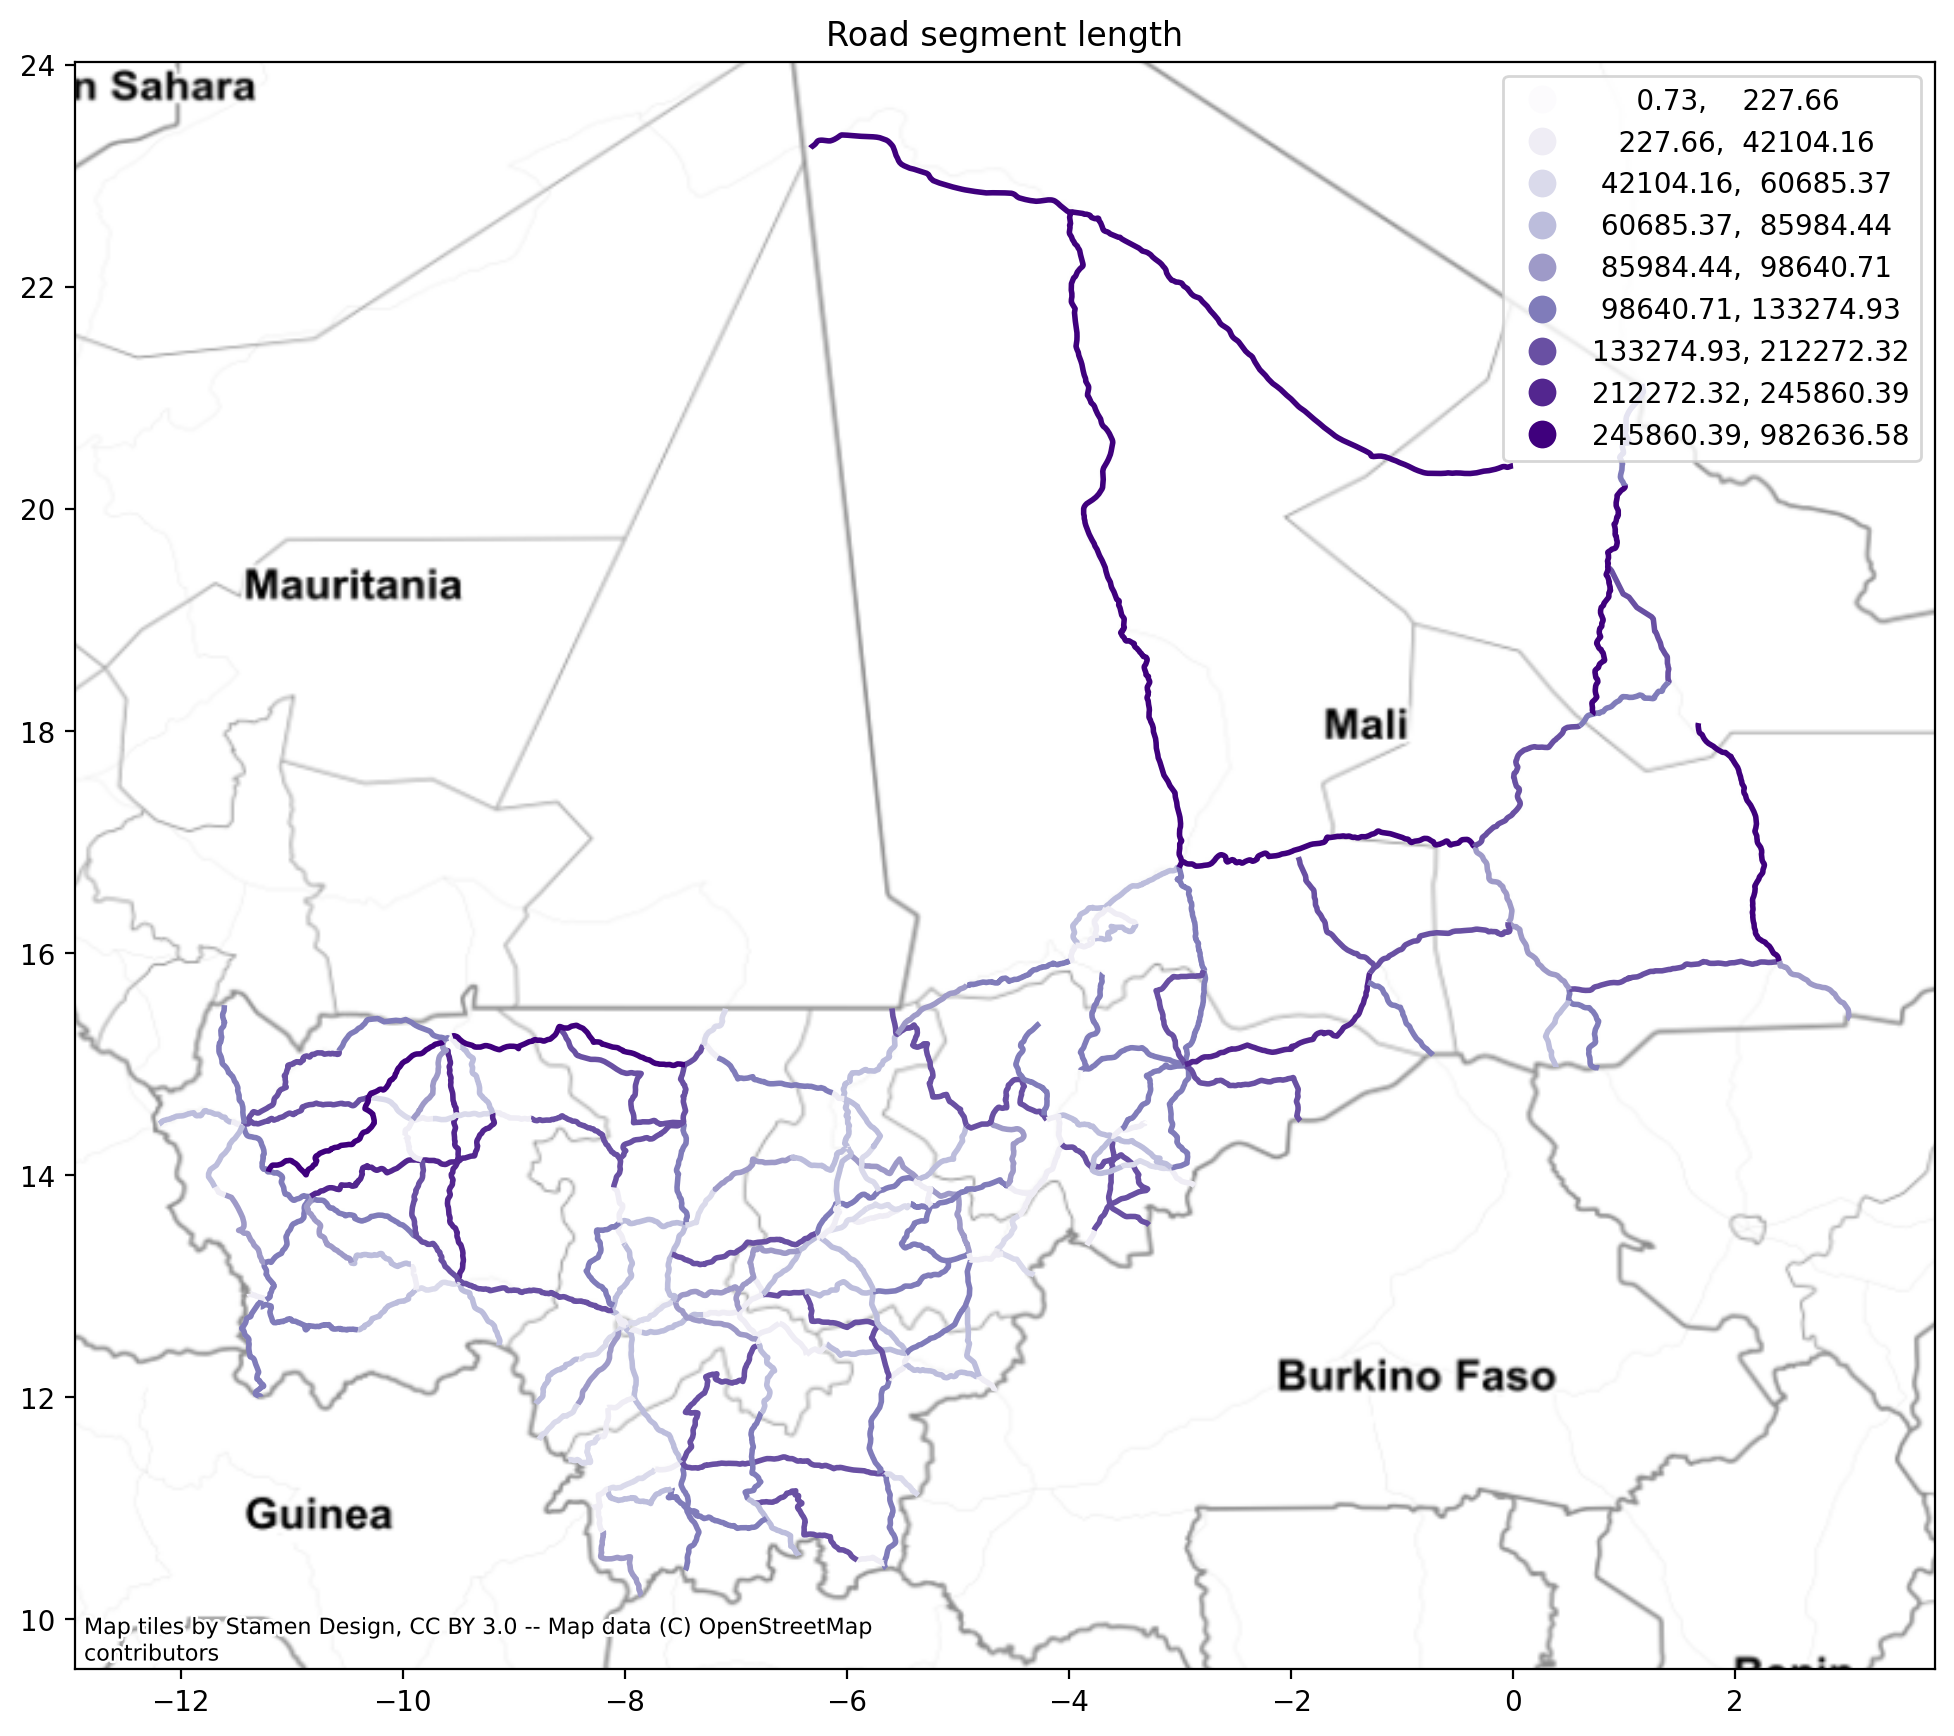

In [21]:
ax = db_tab.assign(
    length=length
).plot(
    "length", 
    scheme="fisherjenkssampled", 
    k=9, 
    legend=True, 
    linewidth=2,
    figsize=(12, 12),
    cmap="Purples"
)
cx.add_basemap(ax, crs=shape.crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.set_title("Road segment length");

## Linearity

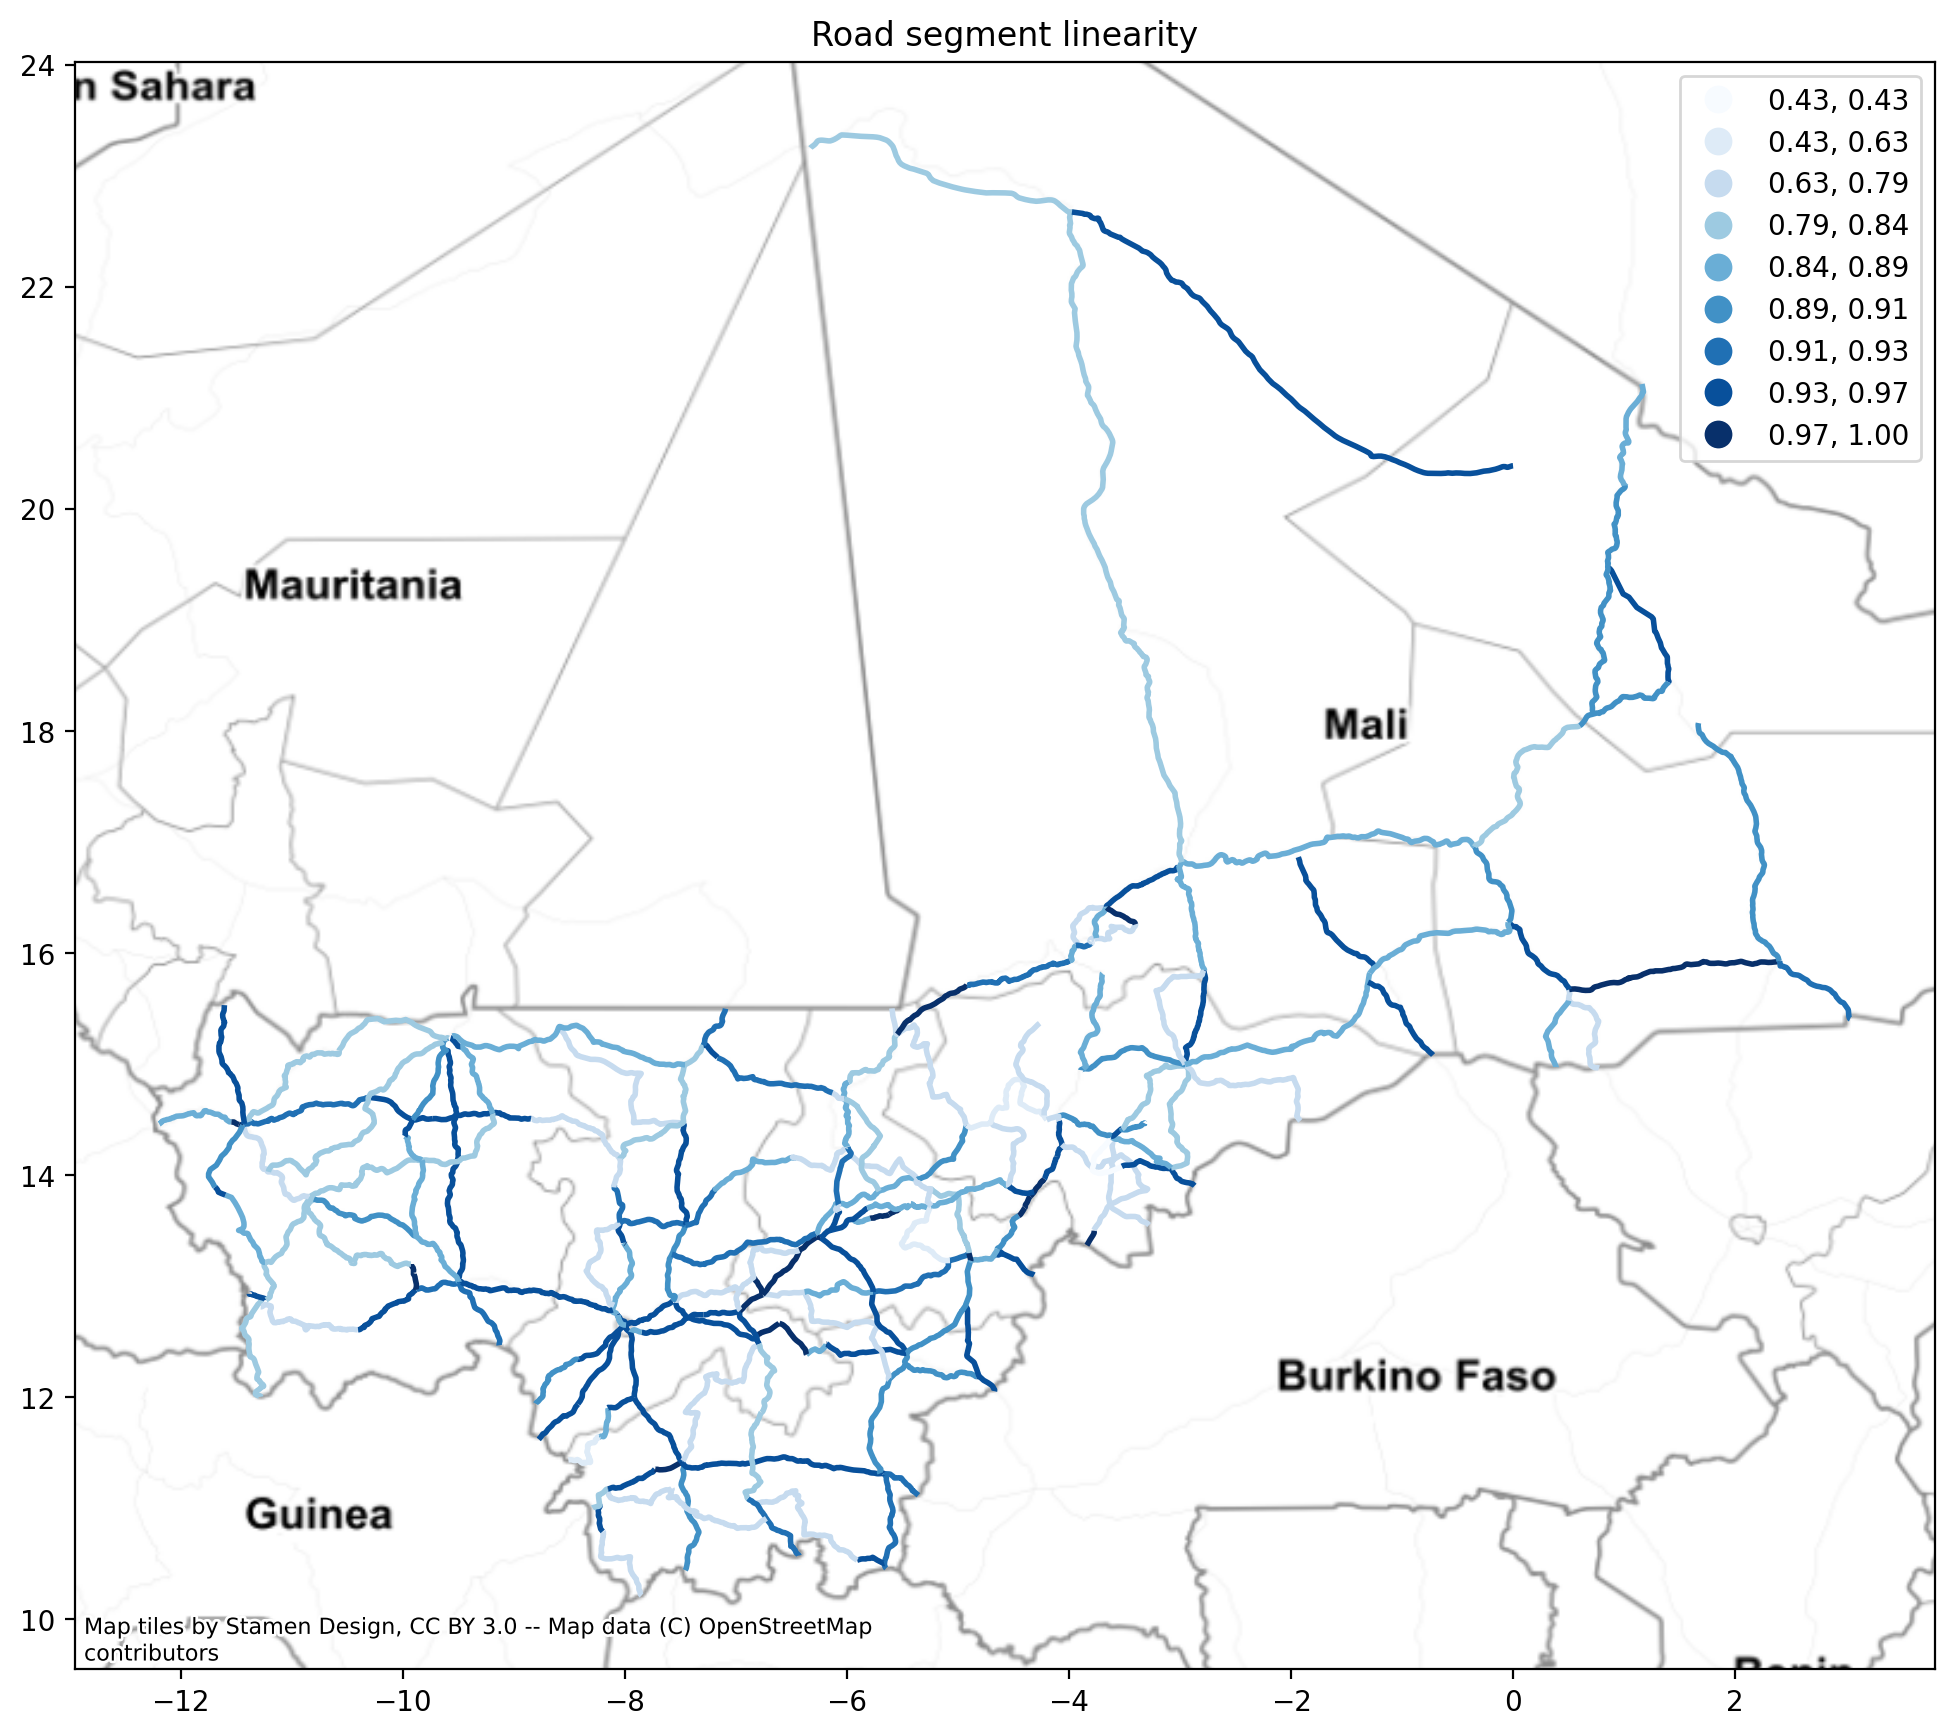

In [22]:
linearity = momepy.Linearity(db_tab).series
linearity.head()

ax = db_tab.assign(
    linearity=linearity
).plot(
    "linearity", 
    scheme="fisherjenkssampled", 
    k=9, 
    legend=True, 
    linewidth=2,
    figsize=(12, 12),
    cmap="Blues"
)
cx.add_basemap(ax, crs=shape.crs.to_string(), source=cx.providers.Stamen.TonerLite)

ax.set_title("Road segment linearity");

## Make Graph of it

In [23]:
db_graph = momepy.gdf_to_nx(db_tab)

db_graph

In [24]:
l = db_tab.loc[0, "geometry"]
l.coords

In [25]:
#first 5 nodes
list(
    db_graph.nodes
)[:5] # Limit to the first five elements

[(-7.454345, 10.440319),
 (-7.4618, 11.383534),
 (-7.8484, 10.212734),
 (-8.192813, 10.788248),
 (-8.1976, 10.789934)]

In [26]:
#first 5 nodes
list(
    db_graph.edges
)[:5] # Limit to the first five elements

[((-7.454345, 10.440319), (-7.4618, 11.383534), 0),
 ((-7.8484, 10.212734), (-8.192813, 10.788248), 1),
 ((-8.1976, 10.789934), (-8.2253, 11.023534), 2),
 ((-5.6448, 10.457734), (-5.668986, 11.312056), 3),
 ((-5.668986, 11.312056), (-7.4851, 11.415134), 15)]

### Degrees

In [27]:
#degrees
degree = list(db_graph.degree)
degree[:5]

[((-7.454345, 10.440319), 1),
 ((-7.4618, 11.383534), 1),
 ((-7.8484, 10.212734), 1),
 ((-8.192813, 10.788248), 1),
 ((-8.1976, 10.789934), 1)]

In [28]:
nc = pd.Series(
    nx.degree_centrality(db_graph)
)
nc.head()

-7.454345  10.440319    0.003509
-7.461800  11.383534    0.003509
-7.848400  10.212734    0.003509
-8.192813  10.788248    0.003509
-8.197600  10.789934    0.003509
dtype: float64

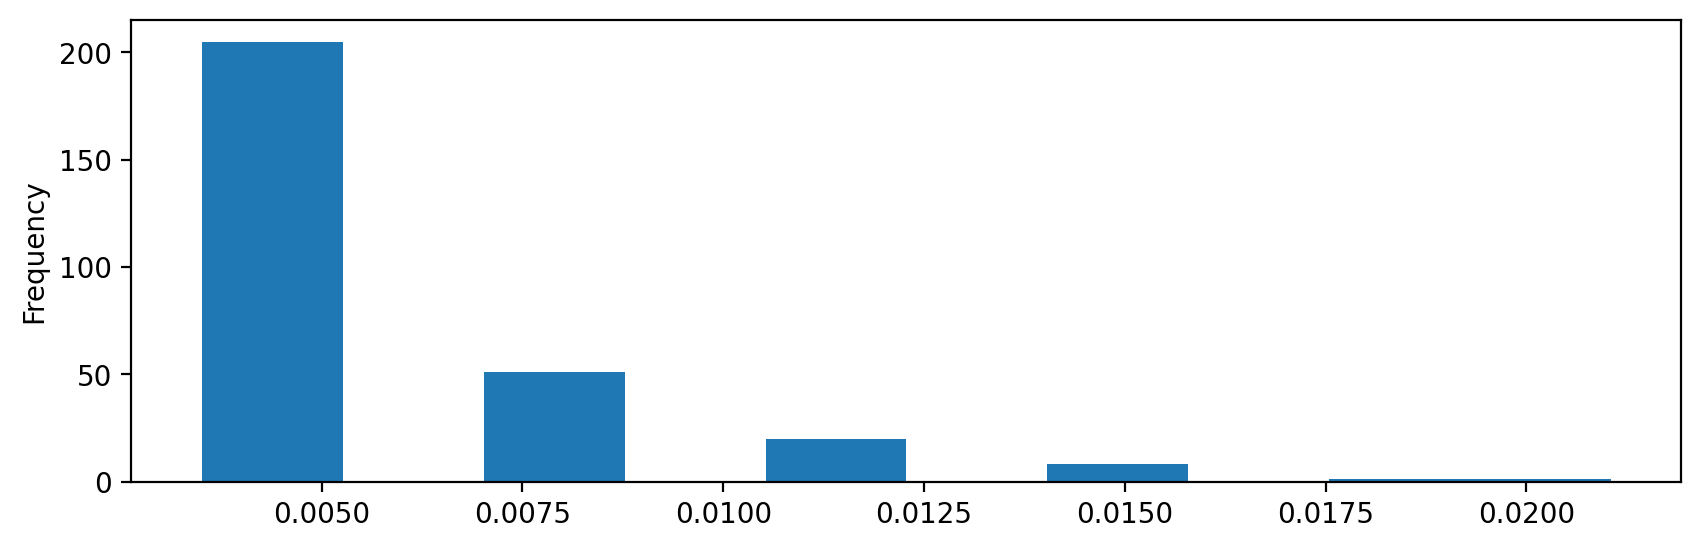

In [29]:
nc.plot.hist(bins=10, figsize=(10, 3));


Degree Centrality

In [30]:
%%time
betweenness = momepy.betweenness_centrality(db_graph)

CPU times: total: 0 ns
Wall time: 42.2 ms


In [31]:
betweenness.nodes

NodeView(((-7.454345, 10.440319), (-7.4618, 11.383534), (-7.8484, 10.212734), (-8.192813, 10.788248), (-8.1976, 10.789934), (-8.2253, 11.023534), (-5.6448, 10.457734), (-5.668986, 11.312056), (-5.6624, 10.500934), (-5.9059, 10.531534), (-5.907105, 10.530926), (-6.8266, 11.042334), (-6.890632, 11.086192), (-6.4305, 10.572834), (-6.7238, 10.906934), (-7.574559, 11.174159), (-7.575153, 11.176056), (-8.152007, 11.172124), (-8.29, 11.001534), (-8.149246, 11.172699), (-7.7284, 11.348534), (-7.725788, 11.347787), (-7.4851, 11.415134), (-5.355623, 11.115706), (-5.6608, 11.304834), (-7.9129, 11.993734), (-7.9878, 12.647934), (-5.700288, 11.311939), (-5.620646, 12.155537), (-5.464901, 12.393419), (-8.1522, 11.904734), (-8.232332, 11.637932), (-8.7742, 11.618634), (-8.420746, 11.936214), (-7.4764, 11.424334), (-6.7911, 12.477334), (-8.801514, 11.940056), (-8.4063, 12.341634), (-8.0566, 12.595134), (-4.8075, 12.182134), (-4.808165, 12.184085), (-5.470497, 12.297569), (-4.830754, 12.184979), (-4.67

In [32]:
betweenness.edges

MultiEdgeView([((-7.454345, 10.440319), (-7.4618, 11.383534), 0), ((-7.8484, 10.212734), (-8.192813, 10.788248), 1), ((-8.1976, 10.789934), (-8.2253, 11.023534), 2), ((-5.6448, 10.457734), (-5.668986, 11.312056), 3), ((-5.668986, 11.312056), (-7.4851, 11.415134), 15), ((-5.6624, 10.500934), (-5.9059, 10.531534), 4), ((-5.9059, 10.531534), (-5.907105, 10.530926), 5), ((-5.9059, 10.531534), (-6.8266, 11.042334), 6), ((-6.890632, 11.086192), (-6.4305, 10.572834), 7), ((-6.890632, 11.086192), (-6.7707, 11.860434), 200), ((-6.7238, 10.906934), (-7.574559, 11.174159), 8), ((-7.575153, 11.176056), (-8.152007, 11.172124), 9), ((-8.152007, 11.172124), (-8.29, 11.001534), 10), ((-8.152007, 11.172124), (-8.149246, 11.172699), 11), ((-8.149246, 11.172699), (-7.7284, 11.348534), 12), ((-7.7284, 11.348534), (-7.725788, 11.347787), 16), ((-7.725788, 11.347787), (-7.4851, 11.415134), 13), ((-7.4851, 11.415134), (-7.9129, 11.993734), 17), ((-5.355623, 11.115706), (-5.6608, 11.304834), 14), ((-7.9129, 1

### Make it a geotable

In [33]:
nodes = momepy.nx_to_gdf(
    betweenness, points=True, lines=False
)

In [34]:
nodes

betweenness  nodeID                    geometry
0       0.000025       0   POINT (-7.45434 10.44032)
1       0.000025       1   POINT (-7.46180 11.38353)
2       0.000025       2   POINT (-7.84840 10.21273)
3       0.000025       3   POINT (-8.19281 10.78825)
4       0.000025       4   POINT (-8.19760 10.78993)
..           ...     ...                         ...
281     0.000638     281   POINT (-6.77070 11.86043)
282     0.000638     282   POINT (-8.06474 12.73904)
283     0.000638     283   POINT (-8.50710 11.43312)
284     0.000025     284  POINT (-11.43890 14.44852)
285     0.000025     285  POINT (-11.69046 13.89004)

[286 rows x 3 columns]

In [35]:
betweenness

### Plot

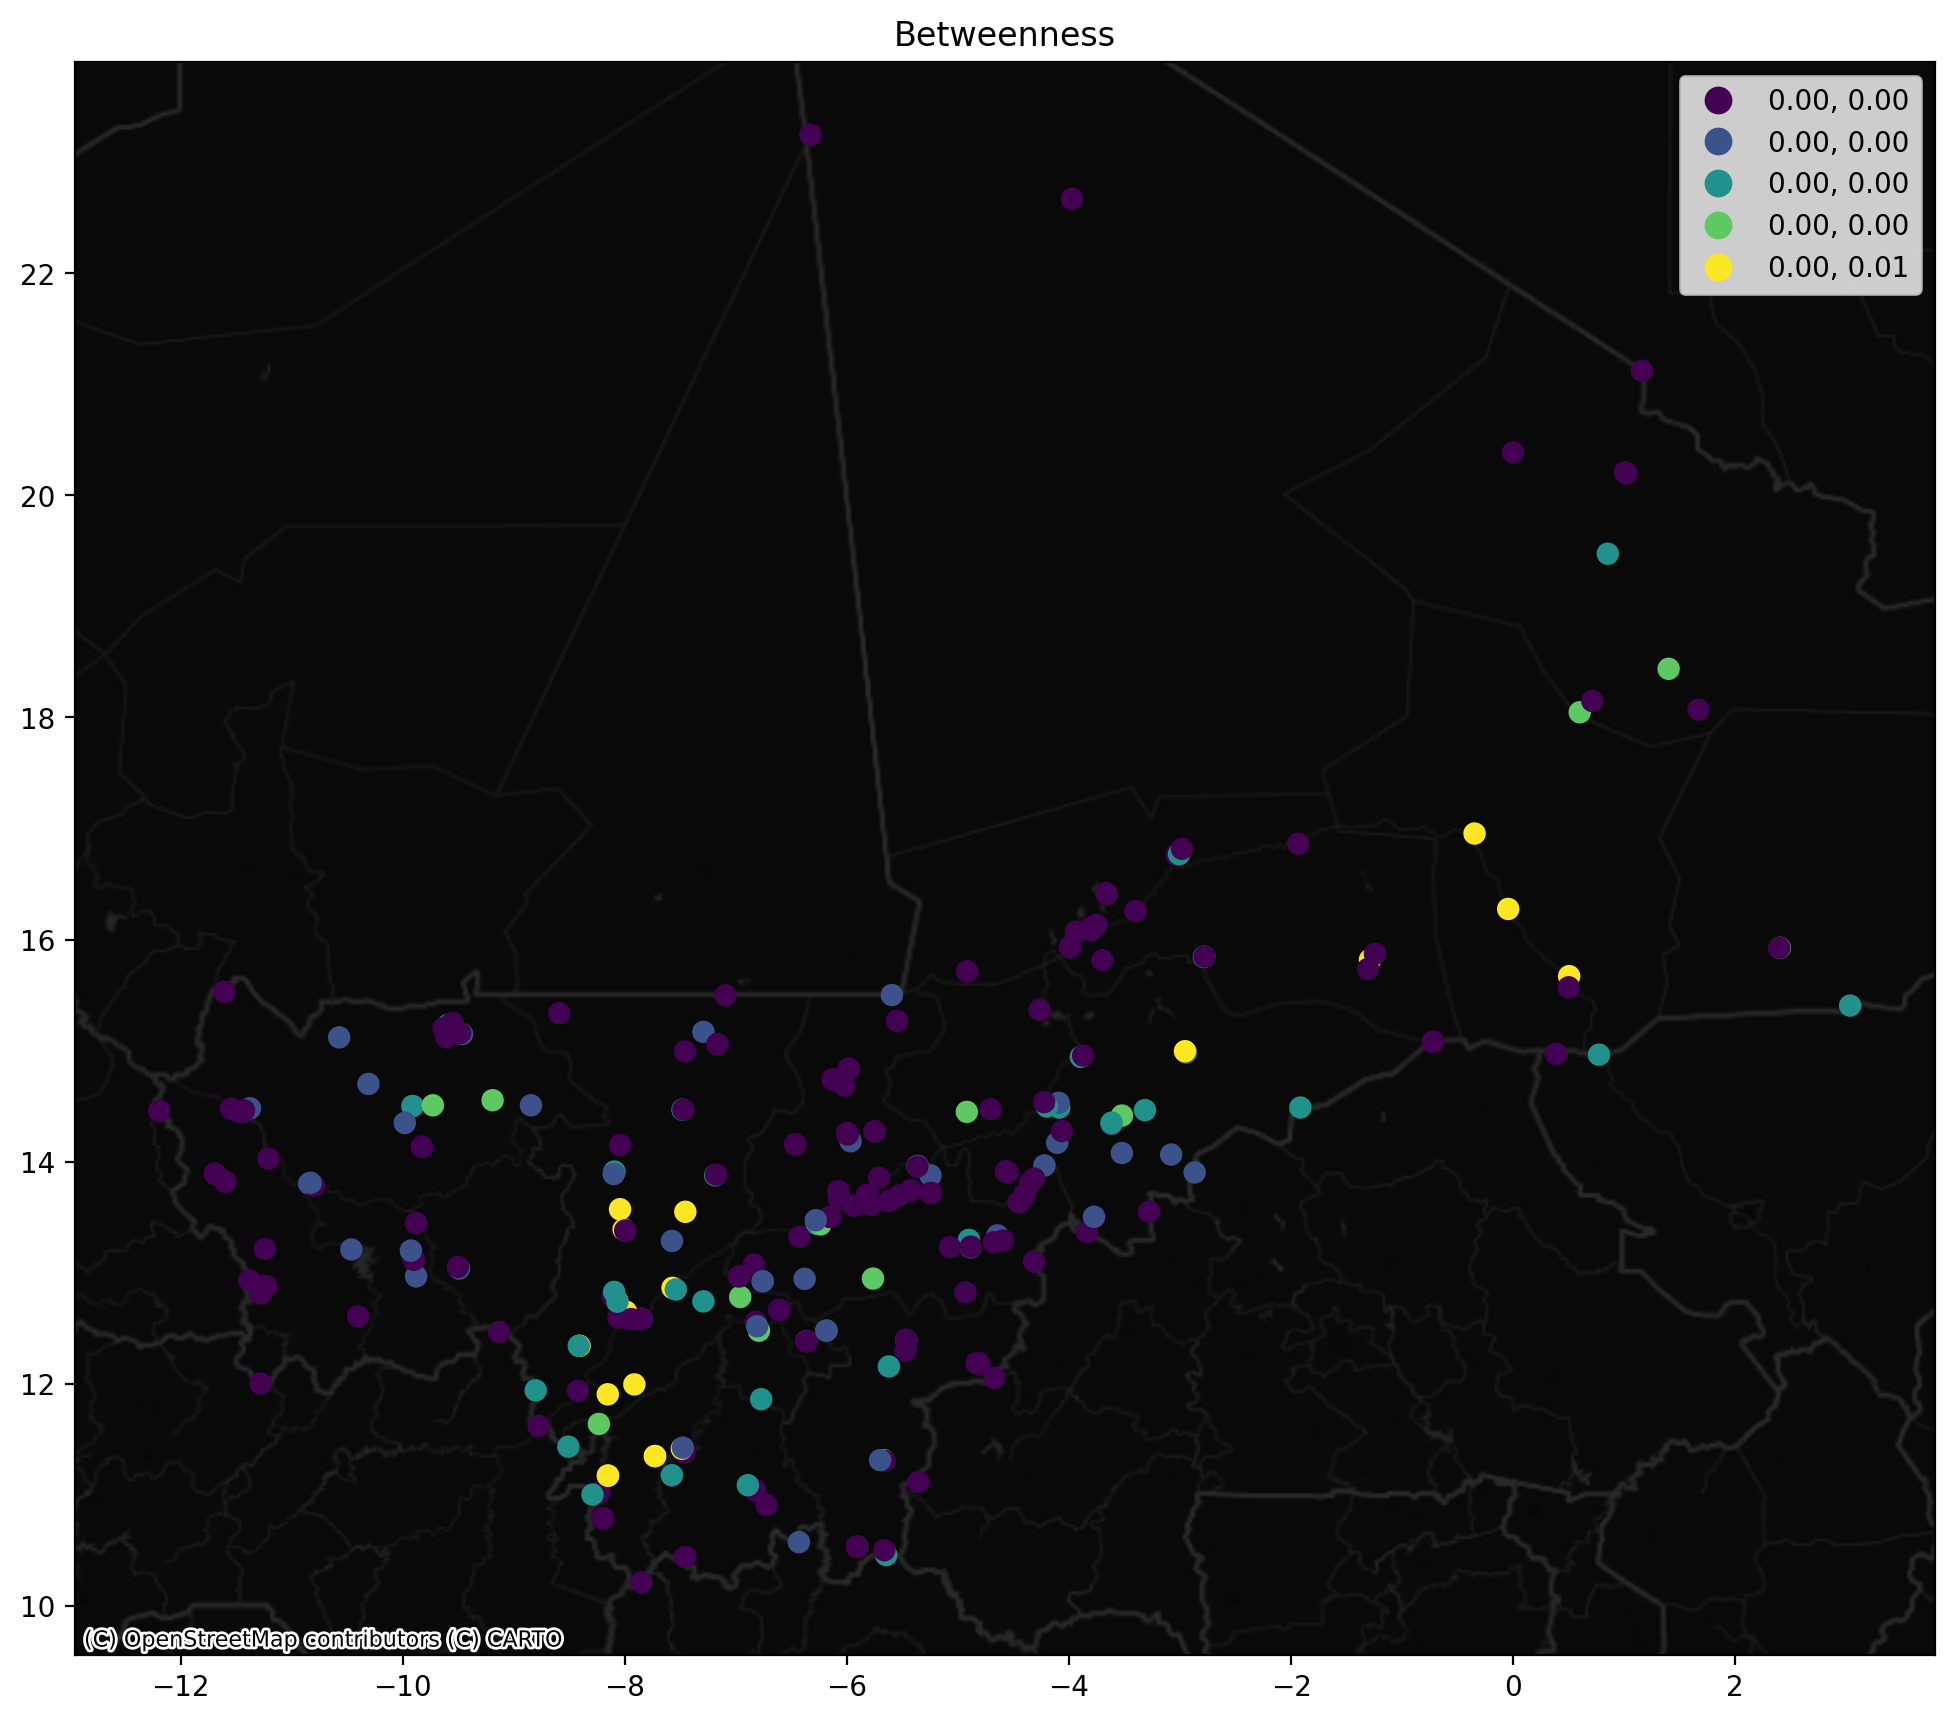

In [36]:
 ax = nodes.plot(
    "betweenness", 
    scheme="fisherjenkssampled",
    markersize=50,
    legend=True, 
    figsize=(12, 12)
)
cx.add_basemap(
    ax, 
    crs=nodes.crs,
    source=cx.providers.CartoDB.DarkMatterNoLabels
)
ax.set_title("Betweenness");

## Edge Based Centrality

### https://docs.momepy.org/en/stable/user_guide/graph/centrality.html

In [37]:
primal = momepy.betweenness_centrality(Primsecgraphprimal, name='betweenness_metric_e', mode='edges', weight='mm_len')


NameError: name 'edge_betwe_allroads_gdf' is not defined

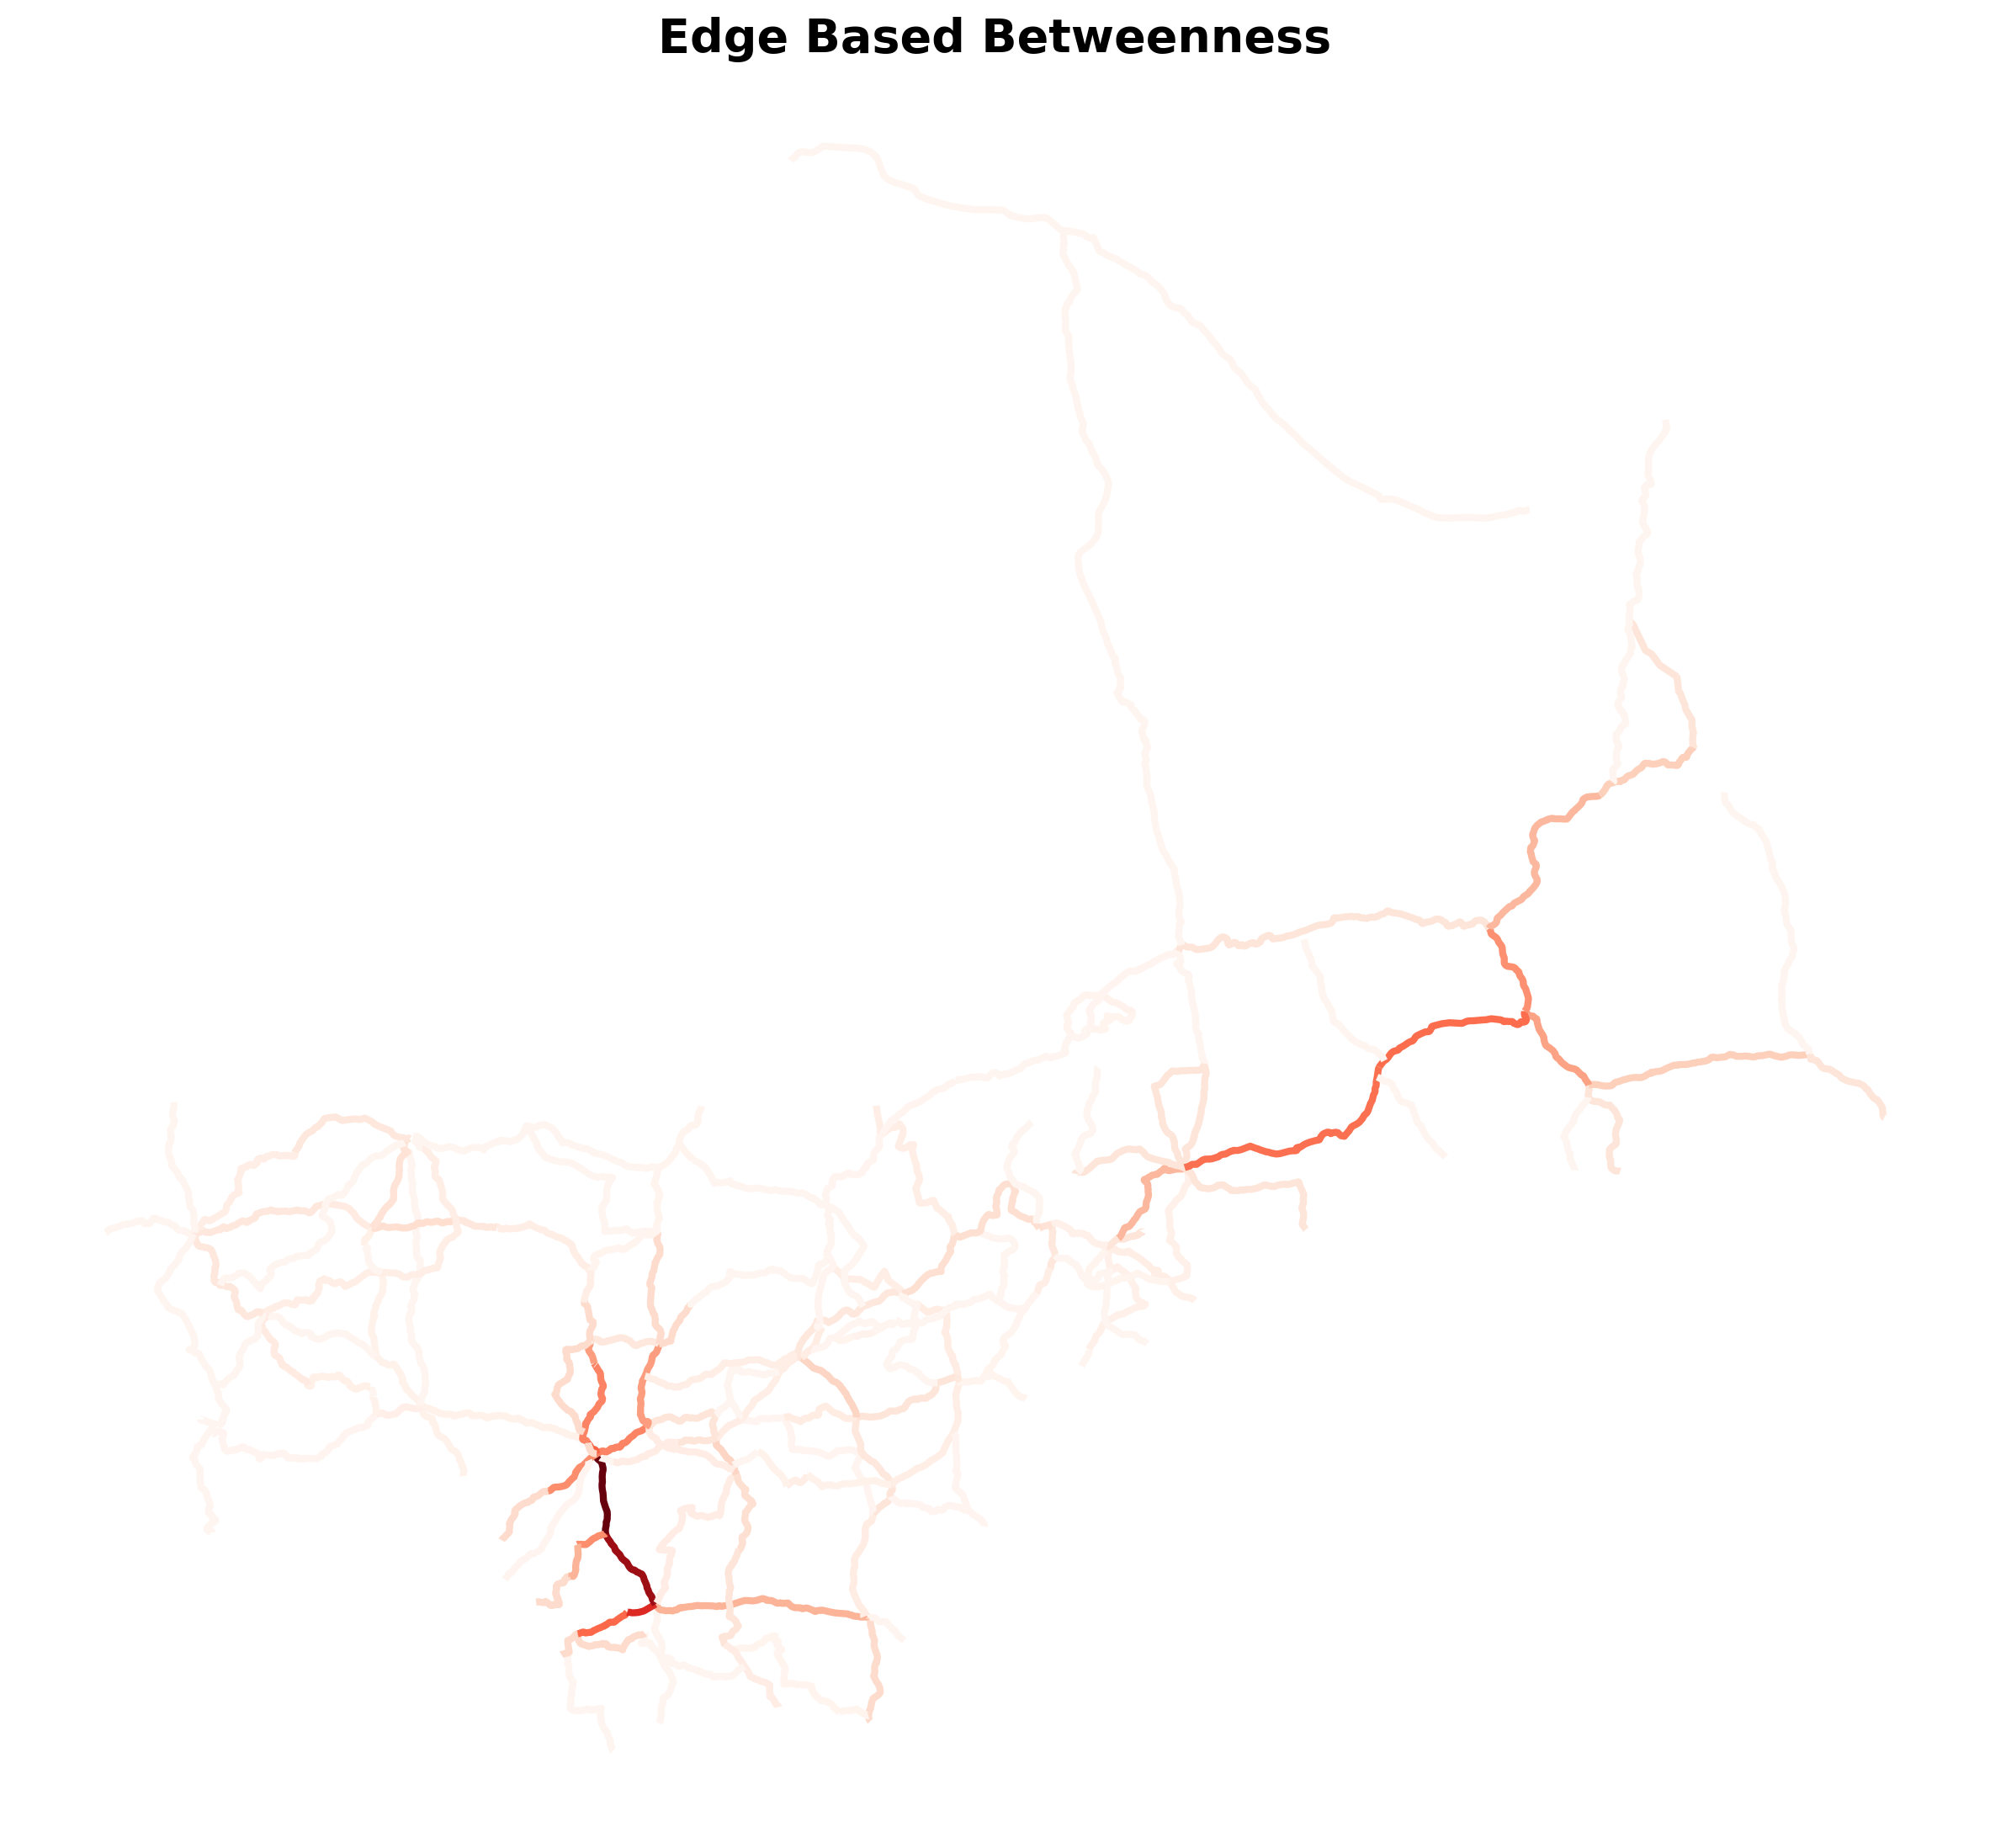

In [38]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)
f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='betweenness_metric_e', cmap='Reds', alpha=1, linewidth=3)
ax.set_axis_off()
ax.set_title('Edge Based Betweenness', fontsize = 20, fontweight ="bold")
cx.add_basemap(ax, crs=edge_betwe_allroads_gdf.crs.to_string())

plt.show()

## Possibilities for Basemaps

In [ ]:
cx.providers.keys()

In [ ]:
cx.providers.OpenStreetMap.keys()

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
primsecnetwork.plot(ax=ax)
ax.set_axis_off()
cx.add_basemap(ax, crs=primal_gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
plt.show()

In [ ]:
primal_gdf

For all the roads

In [ ]:
allroadsexpl = shape.explode()
allroadprimal = momepy.gdf_to_nx(allroadsexpl, approach='primal')

In [ ]:
edge_betwe_allroads = momepy.betweenness_centrality(allroadprimal, name='betweenness_metric_e', mode='edges', weight='mm_len')

In [ ]:

edge_betwe_allroads_gdf = momepy.nx_to_gdf(edge_betwe_allroads, points=False)
f, ax = plt.subplots(figsize=(15, 15))
edge_betwe_allroads_gdf.plot(ax=ax, column='betweenness_metric_e', cmap='Reds', alpha=1, linewidth=2)
ax.set_axis_off()
ax.set_title('Edge Based Betweenness All Roads', fontsize = 20, fontweight ="bold")
cx.add_basemap(ax, crs=edge_betwe_allroads_gdf.crs.to_string())

plt.show()

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

#Visualise the network, the primal graph and a overlap of both 
#Primal Graph
primsecnetworkexpl.plot(color='#e32e00', ax=ax[0])
#Titels
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
#The Network
nx.draw(Primsecgraphprimal, {n:[n[0], n[1]] for n in list(Primsecgraphprimal.nodes)}, ax=ax[1], node_size=15)
#Both in one picture
primsecnetworkexpl.plot(color='#e32e00', ax=ax[2], zorder=-1)
nx.draw(Primsecgraphprimal, {n:[n[0], n[1]] for n in list(Primsecgraphprimal.nodes)}, ax=ax[2], node_size=15)

Make overview of degree centrality

In [ ]:
# Primsecgraphprimaldegree = momepy.node_degree(Primsecgraphprimal, name='degree')

degree = dict(nx.degree(Primsecgraphprimal))
nx.set_node_attributes(Primsecgraphprimal, degree, 'degree')

#nodes, edges, sw = momepy.nx_to_gdf(Primsecgraphprimaldegree, points=True, lines=True,
 #spatial_weights=True)

f, ax = plt.subplots(figsize=(18, 18))
nodes.plot(ax=ax, column='degree', cmap='Reds', markersize=(nodes['degree'] * 100), zorder=1)
edges.plot(ax=ax, color='r', zorder=1)
cx.add_basemap(ax, crs=primsecnetworkexpl.crs.to_string())
ax.set_axis_off()
plt.show()

In [ ]:
edge_betweenness = dict(nx.edge_betweenness_centrality(Primsecgraphprimal))
nx.set_edge_attributes(Primsecgraphprimal, edge_betweenness, 'edge_betweenness')

In [ ]:
f, ax = plt.subplots(figsize=(18, 18))
nodes.plot(ax=ax, color='b', zorder=1)
edges.plot(ax=ax, column='edge_betweenness', cmap='Reds', zorder=1)
cx.add_basemap(ax, crs=primsecnetworkexpl.crs.to_string())
ax.set_axis_off()
plt.show()

In [ ]:
graph = momepy.betweenness_centrality(graph, name='betweenness')
nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='betweenness', cmap='Reds', markersize=(nodes['degree'] * 1000), zorder=2)
edges.plot(ax=ax, color='lightgrey', zorder=1)
cx.add_basemap(ax, crs=better.crs.to_string())
ax.set_axis_off()
plt.show()

### Create a Primal Graph

In [1]:
import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'osmnx'

In [99]:
streets_graph = ox.graph_from_place('Mali', network_type='drive')
streets_graph = ox.projection.project_graph(streets_graph)

NameError: name 'ox' is not defined

In [ ]:
edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

primal = momepy.gdf_to_nx(edges, approach='primal')

### Closing Gaps and Removing False Nodes

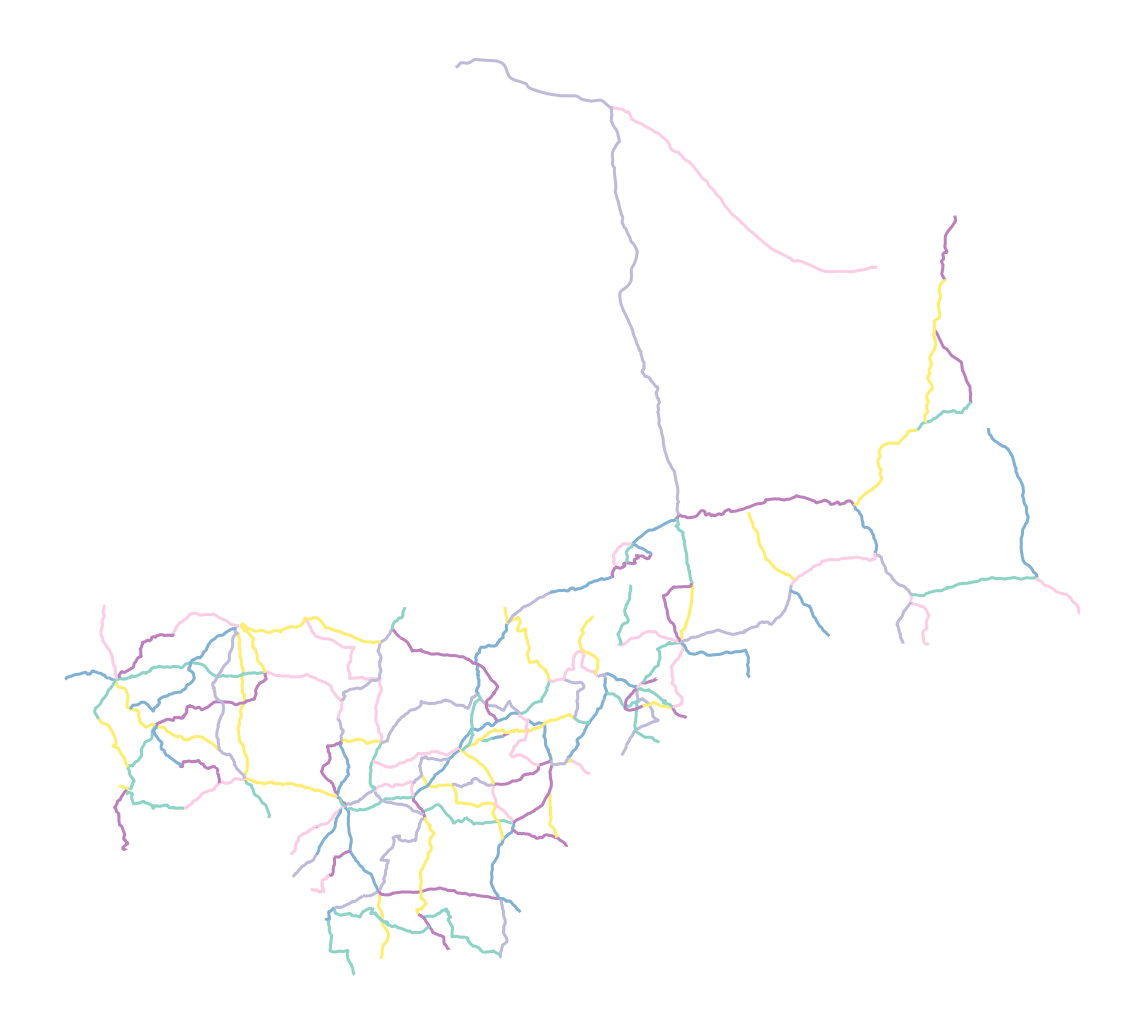

In [70]:
from mapclassify import greedy
#df = gpd.read_file(momepy.datasets.get_path('tests'), layer='broken_network')
pandsoadnetwork.plot(greedy(pandsoadnetwork), categorical=True, figsize=(10, 10), cmap="Set3").set_axis_off()

In [72]:
fixed = momepy.remove_false_nodes(pandsoadnetwork)

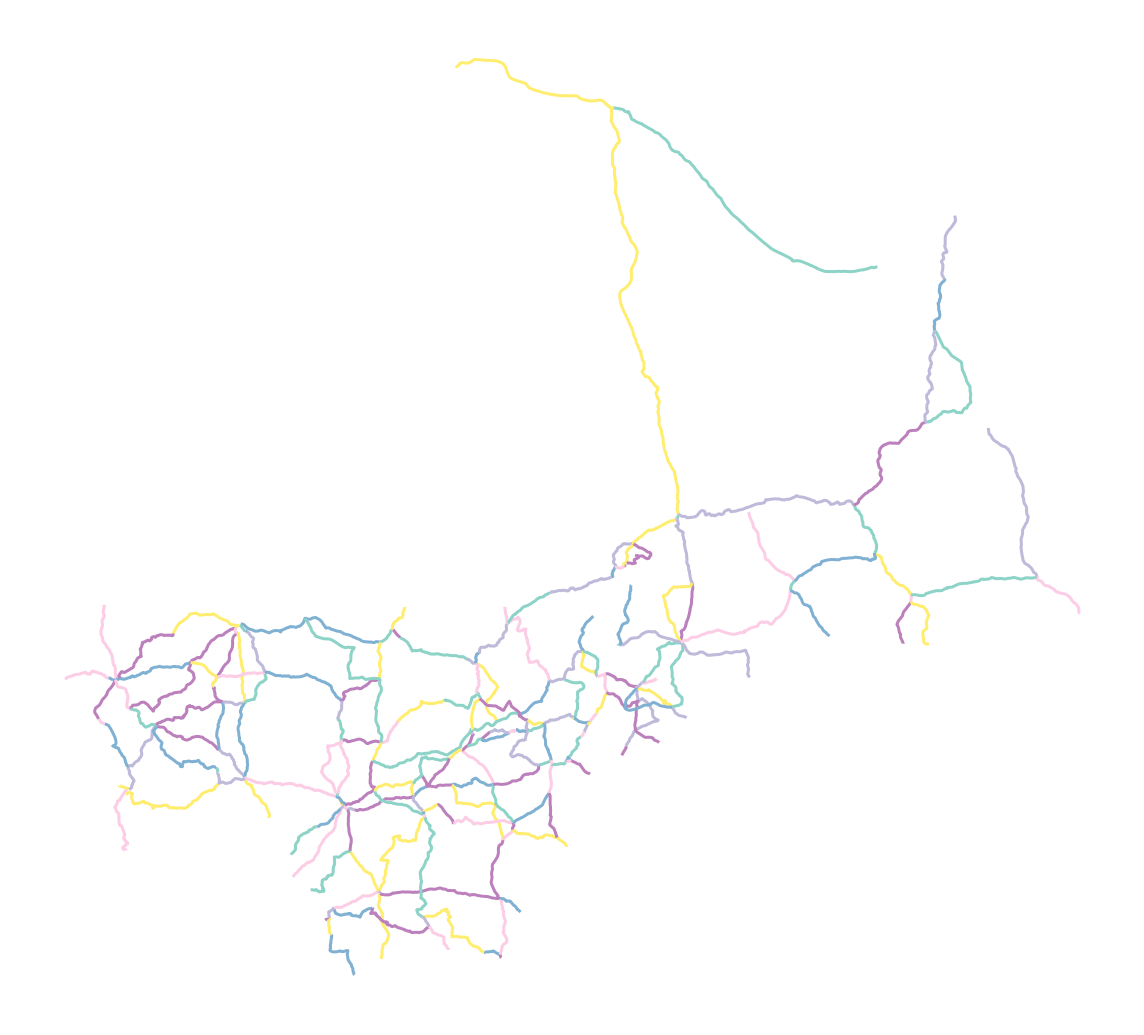

In [73]:
fixed.plot(greedy(fixed), categorical=True, figsize=(10, 10), cmap="Set3").set_axis_off()

Some of the roads connect to the middle of other roads without a node being present, it therefore seems like there is no connection. Because the node is not connected

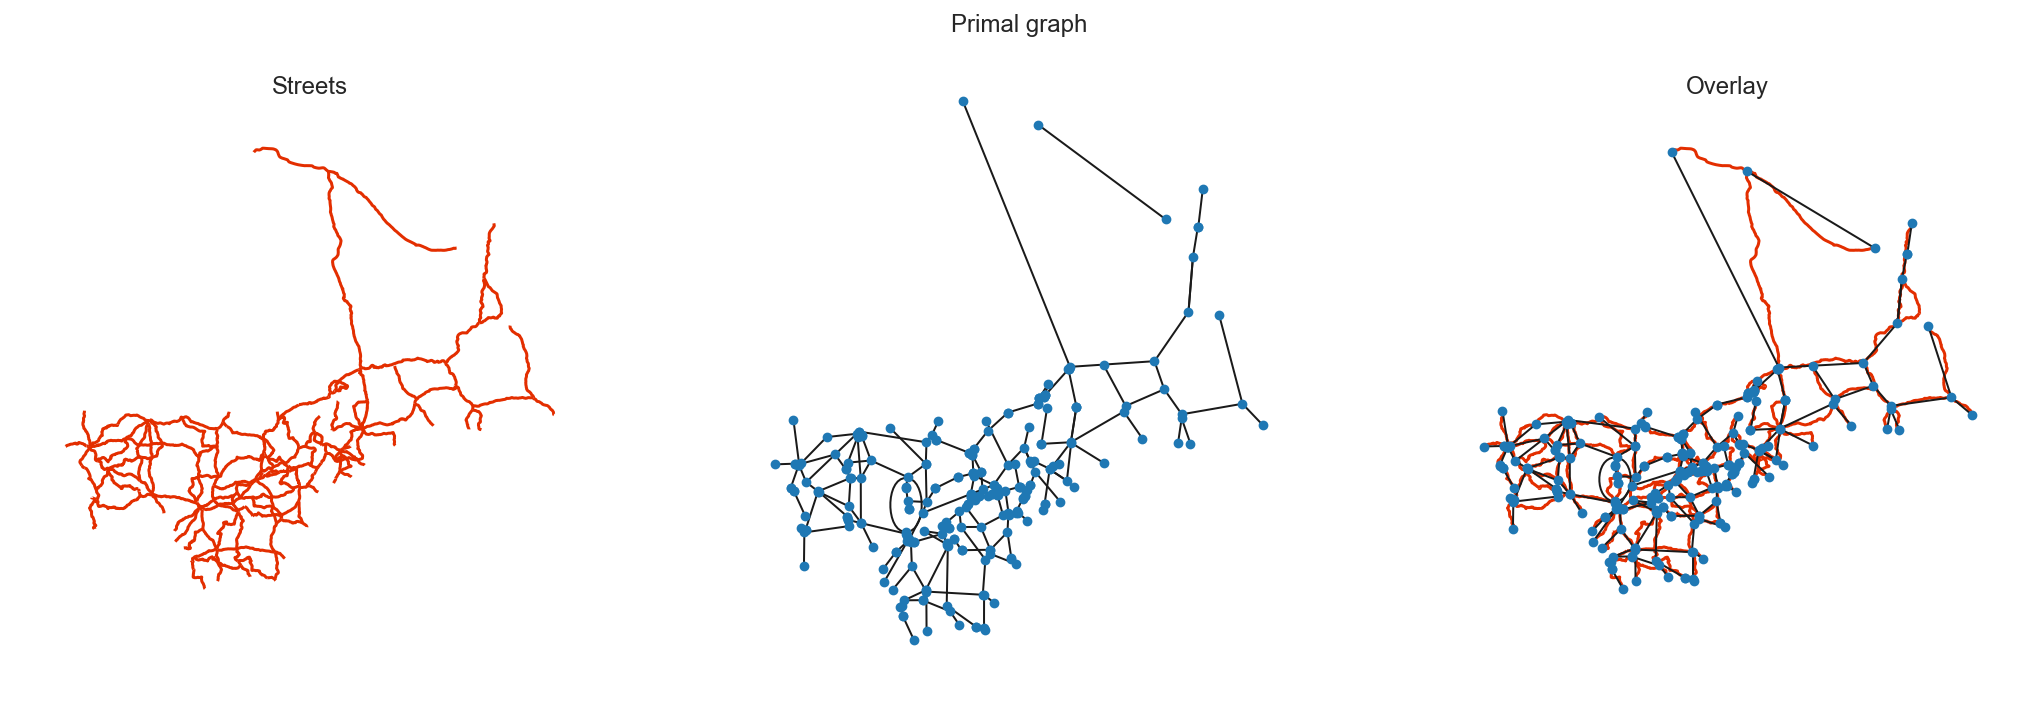

In [75]:
graph = momepy.gdf_to_nx(fixed, approach='primal')

f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
fixed.plot(color='#e32e00', ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[1], node_size=15)
better.plot(color='#e32e00', ax=ax[2], zorder=-1)
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[2], node_size=15)

In [46]:
degree = dict(nx.degree(graph))
nx.set_node_attributes(graph, degree, 'degree')

In [47]:
shapebetter = shape.explode()
graph = momepy.gdf_to_nx(shapebetter, approach='primal')

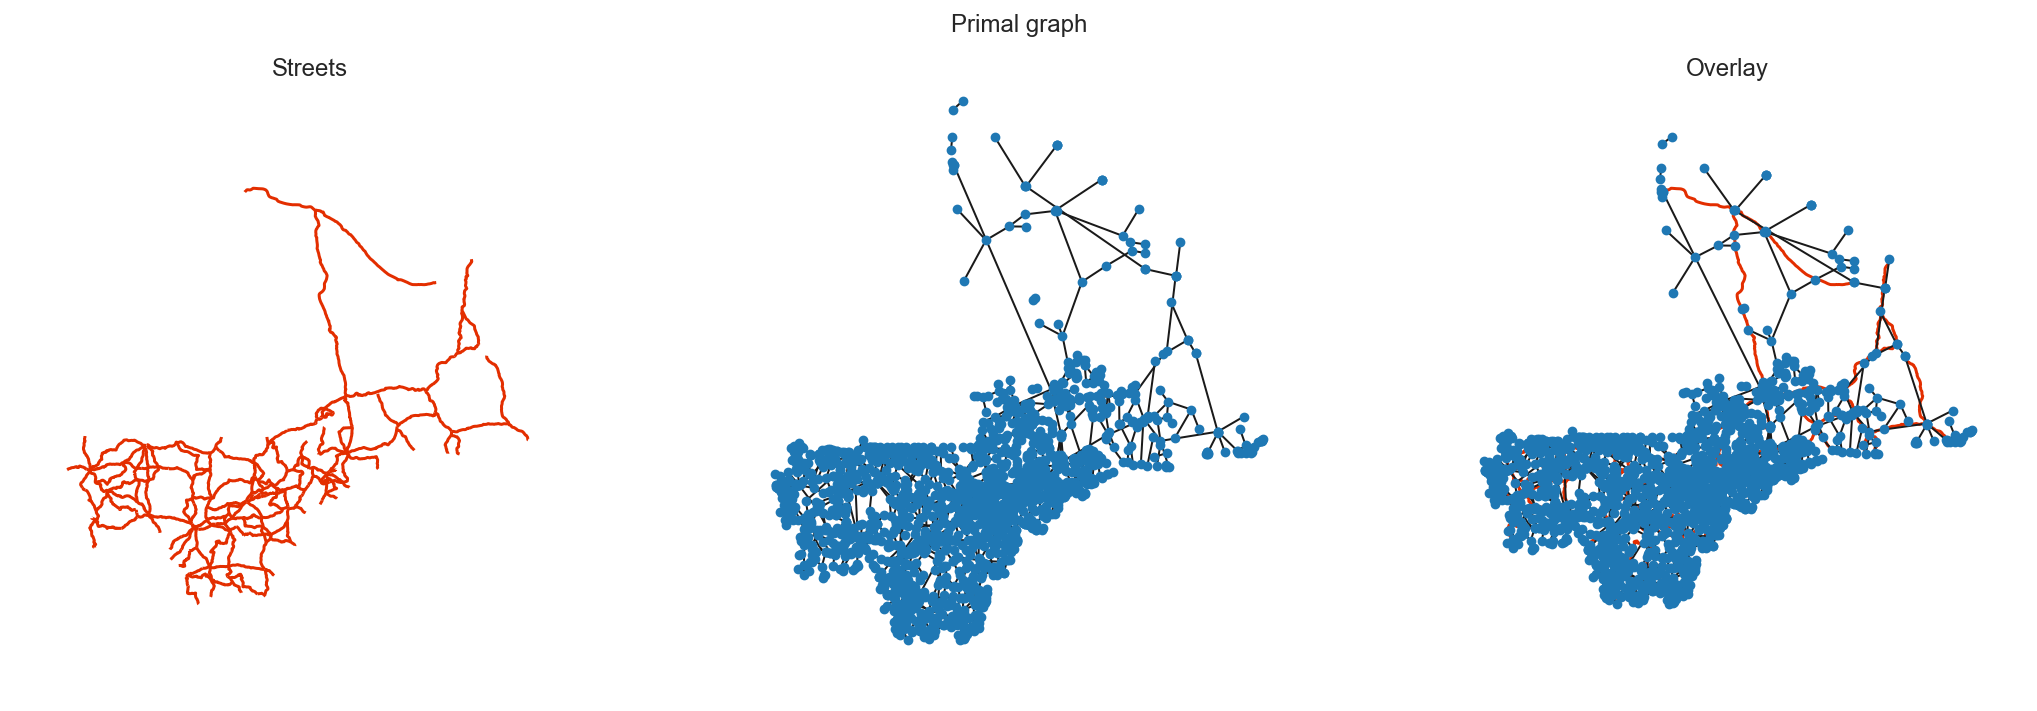

In [48]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
better.plot(color='#e32e00', ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Primal graph", "Overlay")[i])
    facet.axis("off")
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[1], node_size=15)
better.plot(color='#e32e00', ax=ax[2], zorder=-1)
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[2], node_size=15)

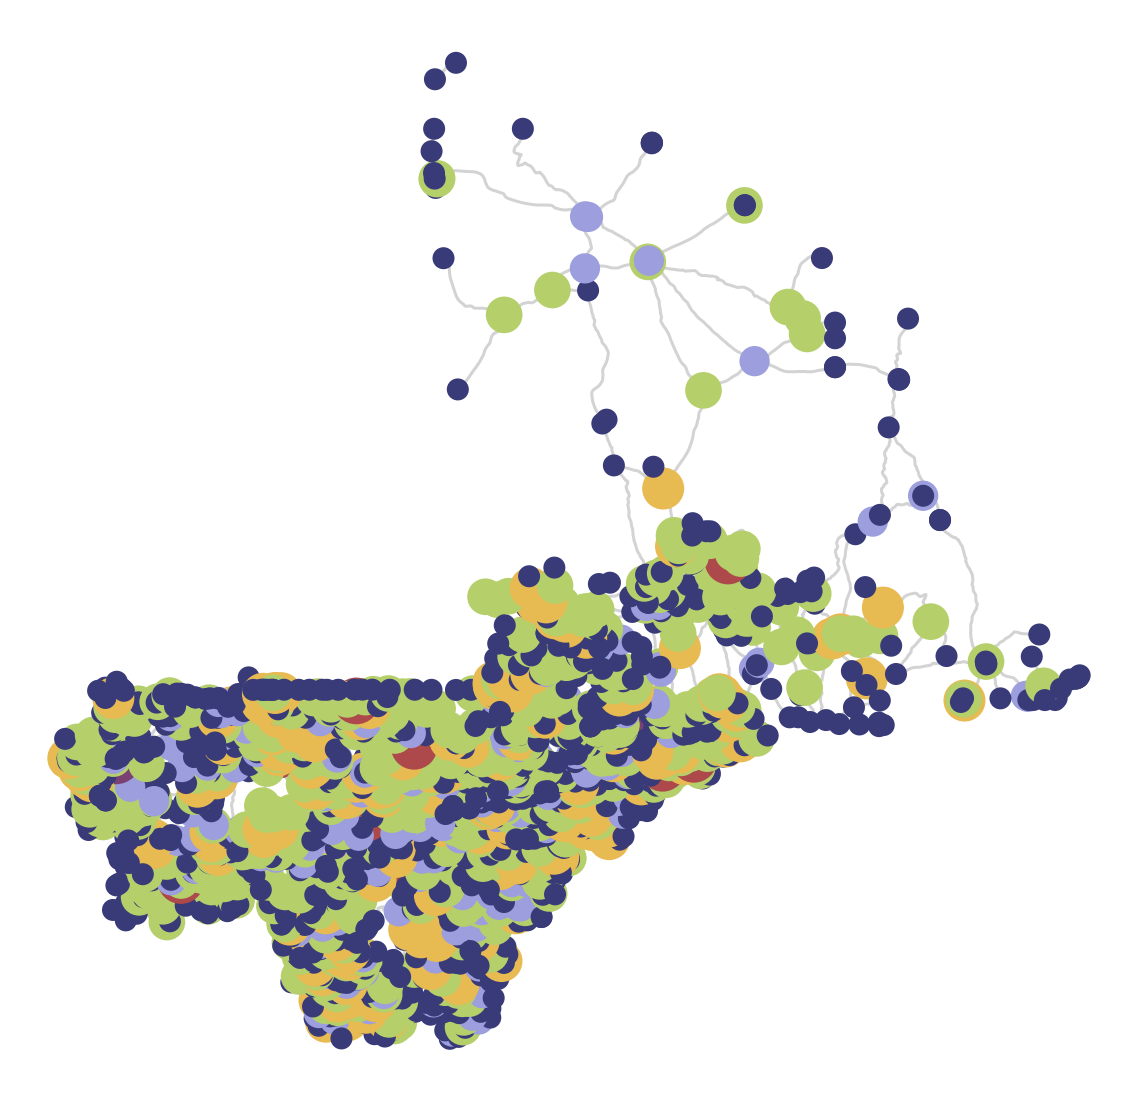

In [49]:
graph = momepy.node_degree(graph, name='degree')
nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='degree', cmap='tab20b', markersize=(nodes['degree'] * 100), zorder=2)
edges.plot(ax=ax, color='lightgrey', zorder=1)
ax.set_axis_off()
plt.show()

In [38]:
betterdual = pandsoadnetwork.explode()
dual = momepy.gdf_to_nx(betterdual, approach='dual')

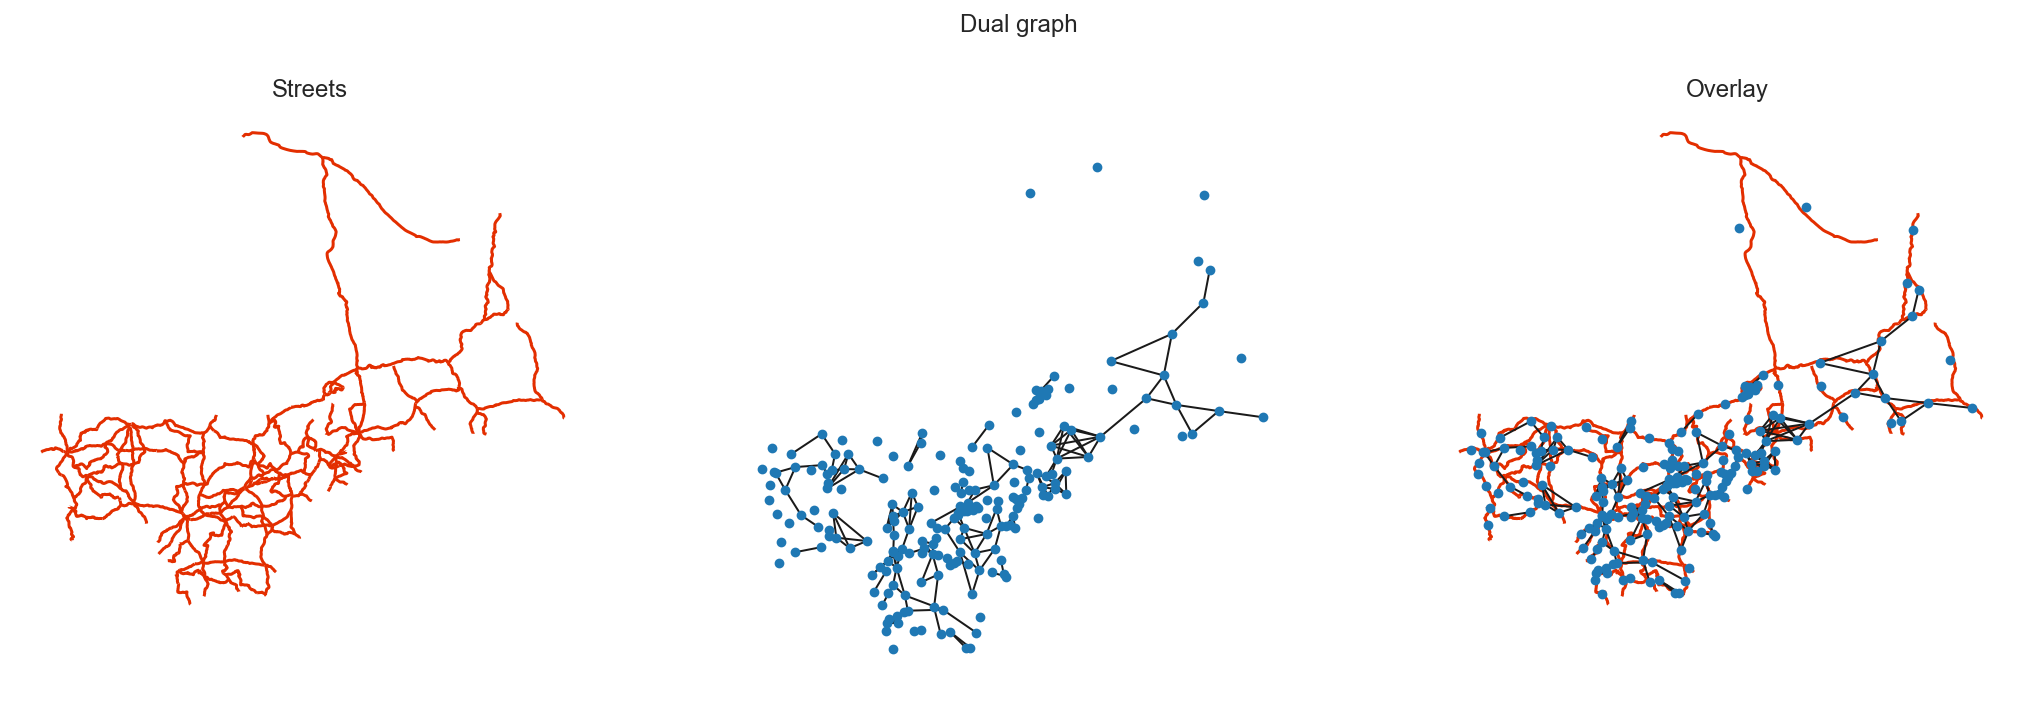

In [39]:
f, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
betterdual.plot(color='#e32e00', ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Dual graph", "Overlay")[i])
    facet.axis("off")
nx.draw(dual, {n:[n[0], n[1]] for n in list(dual.nodes)}, ax=ax[1], node_size=15)
betterdual.plot(color='#e32e00', ax=ax[2], zorder=-1)
nx.draw(dual, {n:[n[0], n[1]] for n in list(dual.nodes)}, ax=ax[2], node_size=15)

---

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
shape.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [115]:
shape.NTLCLASS[305] = 'Track/Trail'

In [103]:
primaryroadnetwork = shape.loc[shape['NTLCLASS']=='Primary']
primaryroadnetwork.head()

OBJECTID_1  FID_1  OBJECTID          SOURCEID  EXS NOTES  ONME     RTENME NTLCLASS  FCLASS  CRGWAY  NUMLANES  LNEWIDTHM  RDWIDTHM  AXLELOADMT  TOTLOADMT  SRFTPE  SRFCOND  SRFPREP  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  BDWTHRPRAC  SPEEDLIMIT  CURNTSPEED  GNRALSPEED  ISUNDRCSTR CSTWRKETC  GRADDEG  SEC  HASSHOULDR  HASSIDEWLK  DRIVSIDE  ISELEVATED  HASMEDIAN  OPSTATUS  SHAPE_LENG  ADM0_CODE ADM0_NAME CONTINENT          REGION     ROADID  Shape_Le_1  Distance  \
12           13    0.0       0.0  srce201105130009  0.0  None   RN9       None  Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.026665      155.0      Mali    Africa  Western Africa  2817007.0    0.026665       115   
17           19    0.0       0.0  srce201105130009  0.0  None   RN7  undefined  Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     1.0      2.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.048033      155.0      Mali    Africa  Western Africa  2817013.0    0.048033       104   
44           61    0.0       0.0  srce201105130009  0.0  None  RN30       None  Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.211827      155.0      Mali    Africa  Western Africa  2817055.0    0.211827        82   
88          118    0.0       0.0  srce201105130009  0.0  None   RN8       None  Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.069957      155.0      Mali    Africa  Western Africa  2817116.0    0.069957        30   
111         162    0.0       0.0  srce201105130009  0.0  None   RN8       None  Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.416958      155.0      Mali    Africa  Western Africa  2817161.0    0.122434        80   

                                              geometry  
12   LINESTRING (-7.45434 10.44032, -7.44568 10.458...  
17   LINESTRING (-5.64480 10.45773, -5.65080 10.463...  
44   LINESTRING (-6.89063 11.08619, -6.87620 11.074...  
88   LINESTRING (-8.29000 11.00153, -8.28600 11.004...  
111  MULTILINESTRING ((-8.14925 11.17270, -8.14140 ...

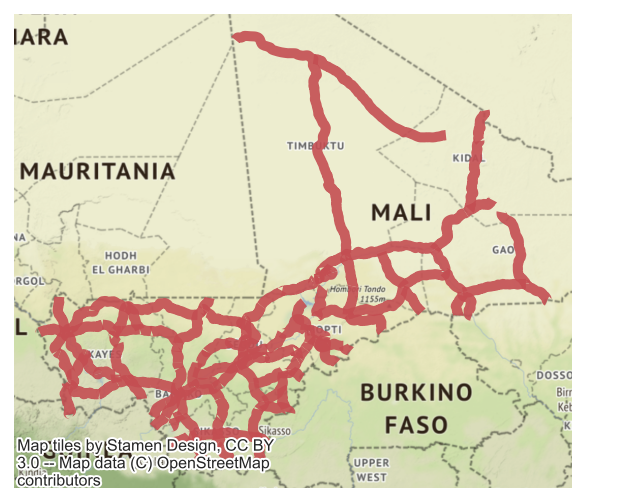

In [122]:
ax = primaryroadnetwork.plot(color="r", linewidth=5, alpha = 0.9, figsize=(5, 5))
ax.set_axis_off()
cx.add_basemap(ax, crs=primaryroadnetwork.crs.to_string())

In [107]:
pandsoadnetwork = shape.loc[(shape['NTLCLASS']=='Primary') | (shape['NTLCLASS']=='Secondary')]
pandsoadnetwork.head()

OBJECTID_1  FID_1  OBJECTID          SOURCEID  EXS NOTES  ONME     RTENME   NTLCLASS  FCLASS  CRGWAY  NUMLANES  LNEWIDTHM  RDWIDTHM  AXLELOADMT  TOTLOADMT  SRFTPE  SRFCOND  SRFPREP  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  BDWTHRPRAC  SPEEDLIMIT  CURNTSPEED  GNRALSPEED  ISUNDRCSTR CSTWRKETC  GRADDEG  SEC  HASSHOULDR  HASSIDEWLK  DRIVSIDE  ISELEVATED  HASMEDIAN  OPSTATUS  SHAPE_LENG  ADM0_CODE ADM0_NAME CONTINENT          REGION     ROADID  Shape_Le_1  Distance  \
12          13    0.0       0.0  srce201105130009  0.0  None   RN9       None    Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.026665      155.0      Mali    Africa  Western Africa  2817007.0    0.026665       115   
15          17    0.0       0.0  srce201105130009  0.0  None  RR18       None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.314656      155.0      Mali    Africa  Western Africa  2817011.0    0.314656       126   
17          19    0.0       0.0  srce201105130009  0.0  None   RN7  undefined    Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     1.0      2.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.048033      155.0      Mali    Africa  Western Africa  2817013.0    0.048033       104   
25          31    0.0       0.0  srce201105130009  0.0  None  RR17       None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.120145      155.0      Mali    Africa  Western Africa  2817025.0    0.120145       192   
44          61    0.0       0.0  srce201105130009  0.0  None  RN30       None    Primary     2.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.211827      155.0      Mali    Africa  Western Africa  2817055.0    0.211827        82   

                                             geometry  
12  LINESTRING (-7.45434 10.44032, -7.44568 10.458...  
15  MULTILINESTRING ((-7.84840 10.21273, -7.85360 ...  
17  LINESTRING (-5.64480 10.45773, -5.65080 10.463...  
25  MULTILINESTRING ((-5.66240 10.50093, -5.66520 ...  
44  LINESTRING (-6.89063 11.08619, -6.87620 11.074...

In [123]:
pandsoadnetwork.loc[(pandsoadnetwork.Distance==0)]

OBJECTID_1  FID_1  OBJECTID          SOURCEID  EXS NOTES  ONME RTENME   NTLCLASS  FCLASS  CRGWAY  NUMLANES  LNEWIDTHM  RDWIDTHM  AXLELOADMT  TOTLOADMT  SRFTPE  SRFCOND  SRFPREP  ISSEASONAL  CURNTPRAC  GDWTHRPRAC  BDWTHRPRAC  SPEEDLIMIT  CURNTSPEED  GNRALSPEED  ISUNDRCSTR CSTWRKETC  GRADDEG  SEC  HASSHOULDR  HASSIDEWLK  DRIVSIDE  ISELEVATED  HASMEDIAN  OPSTATUS  SHAPE_LENG  ADM0_CODE ADM0_NAME CONTINENT          REGION     ROADID  Shape_Le_1  Distance  \
107         156    0.0       0.0  srce201105130009  0.0  None  None   None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.416958      155.0      Mali    Africa  Western Africa  2817154.0    0.002820         0   
140         200    0.0       0.0  srce201105130009  0.0  None  None   None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.260142      155.0      Mali    Africa  Western Africa  2817201.0    0.002717         0   
263         369    0.0       0.0  srce201105130009  0.0  None  None   None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.136973      155.0      Mali    Africa  Western Africa  2817372.0    0.002061         0   
314         455    0.0       0.0  srce201211260002  0.0  None  None   None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     3.0      2.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.000000      155.0      Mali    Africa  Western Africa  2817461.0    0.003320         0   
610         876    0.0       0.0  srce201211260002  0.0  None  None   None  Secondary     3.0     0.0       0.0        0.0       0.0         0.0        0.0     0.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.000000      155.0      Mali    Africa  Western Africa  2817885.0    0.000007         0   
739        1077    0.0       0.0  srce201211260002  0.0  None  None   None  Secondary     4.0     0.0       0.0        0.0       0.0         0.0        0.0     2.0      0.0      0.0         0.0        0.0         0.0         0.0         0.0         0.0         0.0         0.0      None      0.0  0.0         0.0         0.0       0.0         0.0        0.0       0.0    0.000000      155.0      Mali    Africa  Western Africa  2818096.0    0.000126         0   

                                              geometry  
107  LINESTRING (-8.15201 11.17212, -8.14925 11.17270)  
140  LINESTRING (-7.72840 11.34853, -7.72579 11.34779)  
263  LINESTRING (-4.80750 12.18213, -4.80816 12.18408)  
314  LINESTRING (-6.18459 12.47820, -6.18129 12.47853)  
610  LINESTRING (-6.14990 13.50186, -6.14989 13.50186)  
739  LINESTRING (-4.55458 13.90491, -4.55452 13.904...

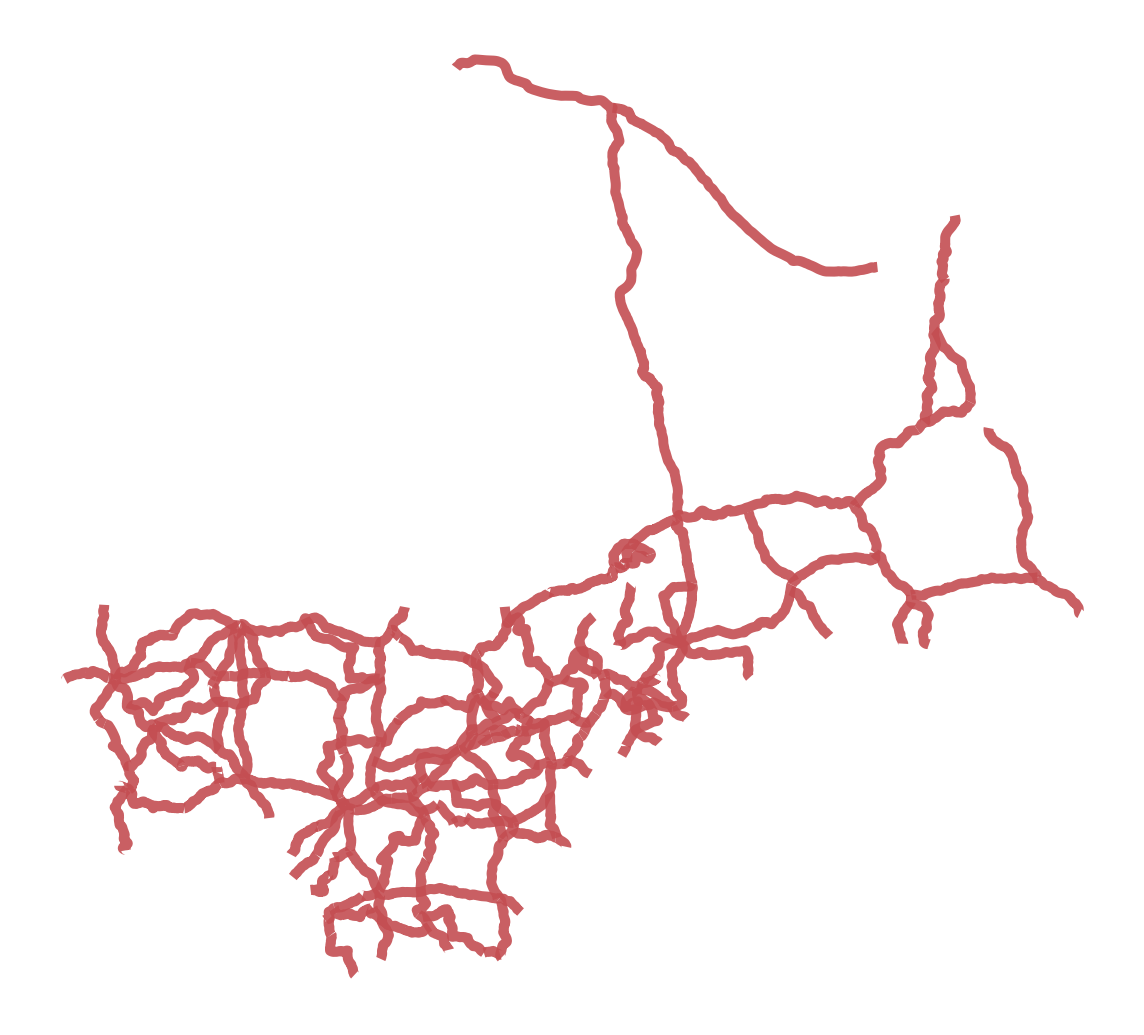

In [125]:
ax = pandsoadnetwork.plot(color="r", linewidth=5, alpha = 0.9, figsize=(10, 10))
ax.set_axis_off()
cx.add_basemap(ax, crs=pandsoadnetwork.crs.to_string())

seg = pandsoadnetwork.Distance[state_names.index('Texas')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

In [34]:
shape.ADM0_NAME.apply(type)

0            <class 'str'>
1            <class 'str'>
2            <class 'str'>
3            <class 'str'>
4            <class 'str'>
               ...        
1847    <class 'NoneType'>
1848    <class 'NoneType'>
1849    <class 'NoneType'>
1850    <class 'NoneType'>
1851    <class 'NoneType'>
Name: ADM0_NAME, Length: 1852, dtype: object

In [80]:
nullvaluesNTLCLASS=shape.loc[shape['NTLCLASS'].isnull()]
NRnullvalNTLCLASS = len(nullvaluesNTLCLASS)
nullvaluesCONTINENT=shape.loc[shape['CONTINENT'].isnull()]
NRnullvaCONTINENT = len(nullvaluesCONTINENT)
nullvaluesREGION=shape.loc[shape['REGION'].isnull()]
NRnullvaREGION = len(nullvaluesREGION)
nullvaluesDistance=shape.loc[shape['Distance']== 0]
NRnullvaDistance = len(nullvaluesDistance)
nullvaluesgeometry=shape.loc[shape['geometry'].isnull()]
NRnullvageometry = len(nullvaluesgeometry)
nullvaluesShape_Le_1 = shape.loc[shape['Shape_Le_1'].isnull()]
NRnullvaShape_Le_1 = len(nullvaluesShape_Le_1)

In [77]:
NRnullvaShape_Le_1

0

In [78]:
NRnullvageometry

0

In [81]:
NRnullvaDistance

86

In [82]:
NRnullvaCONTINENT

7

In [83]:
NRnullvalNTLCLASS

5

In [84]:
NRnullvaREGION

7